In [3]:
#%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
def plot_movement_trajectory(file_path):
    
    #get the trial no for the title
    file_name = os.path.basename(file_path)
    trial_no = file_name.split('_')[-1].split('.')[0]


    # Load the data from the CSV file
    movement_data = pd.read_csv(file_path)

    # Extract position coordinates and time
    pos_x = movement_data['pos_x']
    pos_z = movement_data['pos_z']
    time = movement_data['time']

    # Create a 2D plot with a trail effect viewed from above (X vs Z) using time for color gradient
    plt.figure(figsize=(10, 8))
    plt.scatter(pos_x, pos_z, c=time, cmap='viridis', s=5)
    plt.xlabel('X Position')
    plt.ylabel('Z Position')
    plt.title(f'Top-Down View of Movement Trajectory with Trail Effect for {trial_no}')
    plt.colorbar(label='Time')
    plt.grid(True)
    plt.show()



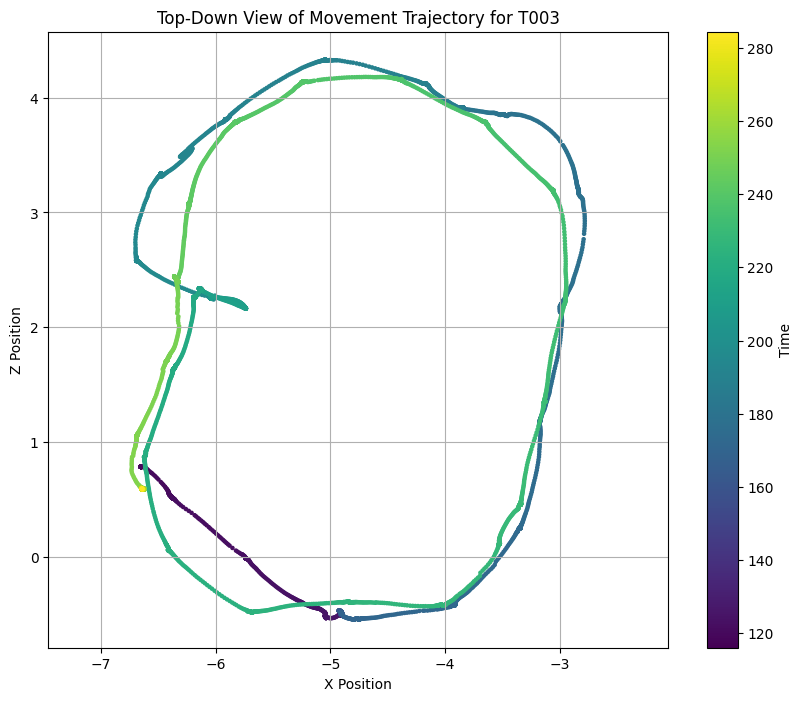

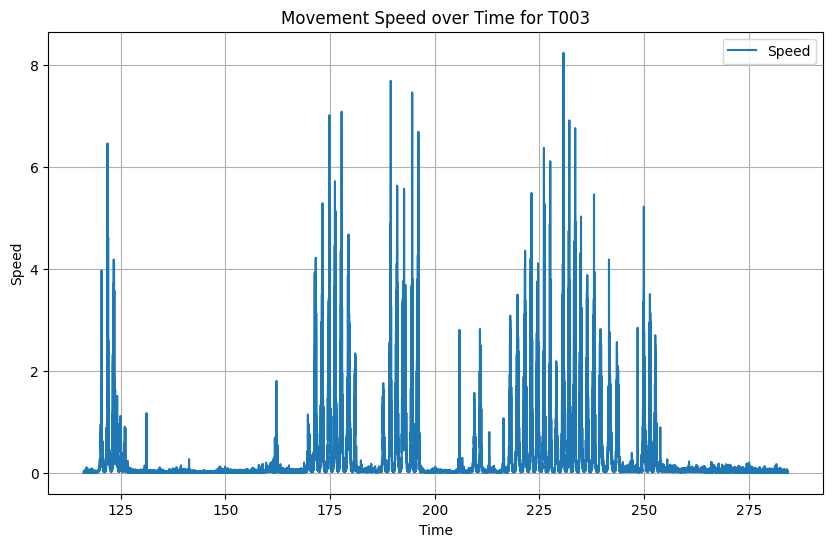

In [7]:
def plot_movement_trajectory_with_speed(file_path):


    # get the trial no for the title
    file_name = os.path.basename(file_path)
    trial_no = file_name.split('_')[-1].split('.')[0]

    # Load the data from the CSV file
    movement_data = pd.read_csv(file_path)

    # Extract position coordinates and time
    pos_x = movement_data['pos_x']
    pos_y = movement_data['pos_y']
    pos_z = movement_data['pos_z']
    time = movement_data['time']

    # Calculate distances between consecutive points
    distances = np.sqrt(np.diff(pos_x)**2 + np.diff(pos_y)**2 + np.diff(pos_z)**2)

    # Calculate time differences between consecutive points
    time_diff = np.diff(time)

    # Calculate speed (distance / time)
    speed = distances / time_diff

    # Plot the top-down view of the movement trajectory with trail effect
    plt.figure(figsize=(10, 8))
    plt.scatter(pos_x, pos_z, c=time, cmap='viridis', s=5)
    plt.xlabel('X Position')
    plt.ylabel('Z Position')
    plt.title(f'Top-Down View of Movement Trajectory for {trial_no}')
    plt.colorbar(label='Time')
    plt.grid(True)
    plt.axis('equal')
    plt.show()

    # Plot the speed over time
    plt.figure(figsize=(10, 6))
    plt.plot(time[:-1], speed, label='Speed')
    plt.xlabel('Time')
    plt.ylabel('Speed')
    plt.title(f'Movement Speed over Time for {trial_no}')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_movement_trajectory_with_speed(r'C:\Users\lal\Documents\tez\analysis\vr\vrtracking\trackerR_movement_T003.csv')

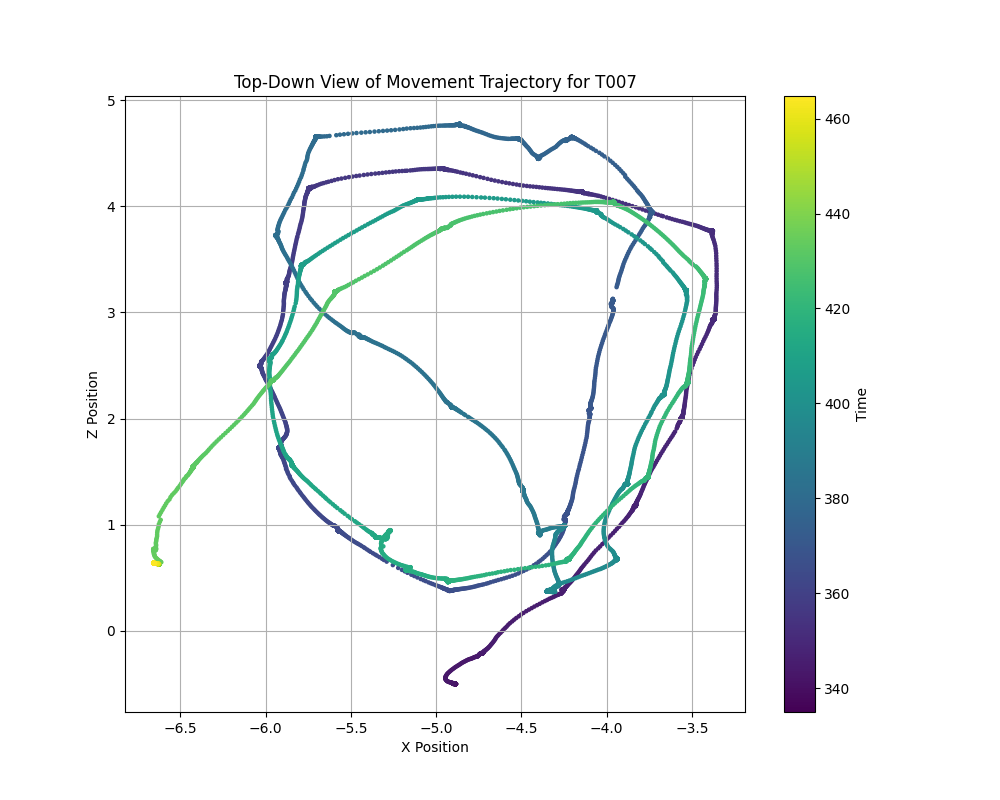

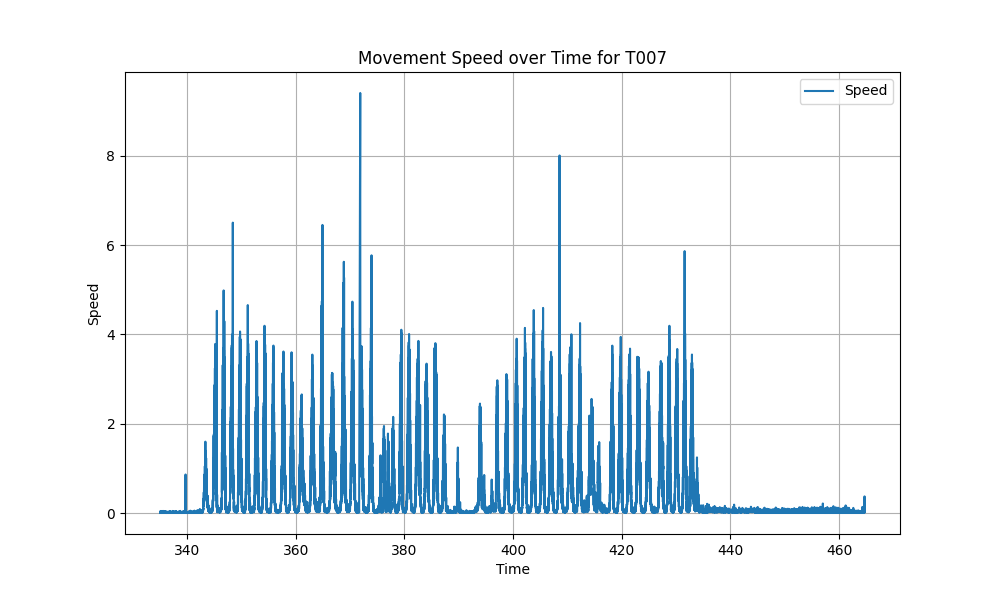

In [5]:
plot_movement_trajectory_with_speed(r'C:\Users\lal\Documents\tez\analysis\vr\vrtracking\trackerR_movement_T007.csv')

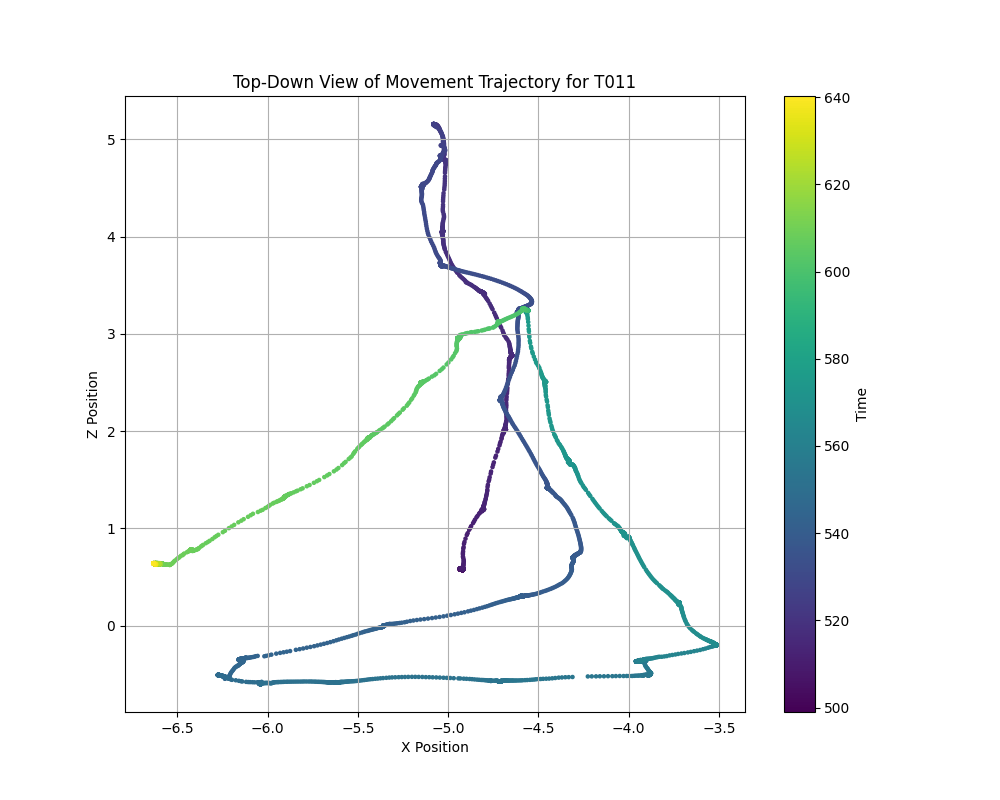

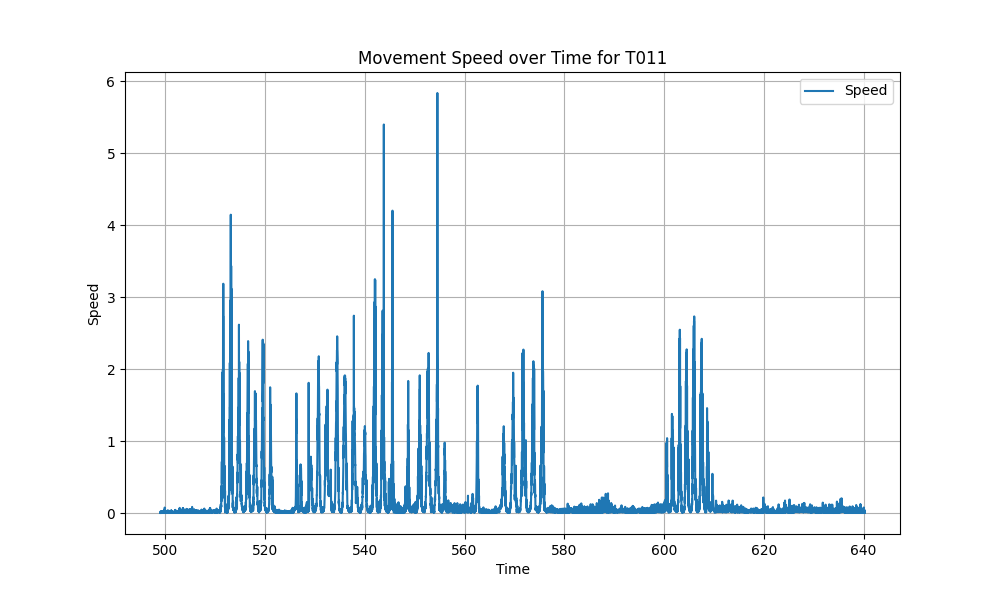

In [6]:
plot_movement_trajectory_with_speed(r'C:\Users\lal\Documents\tez\analysis\vr\vrtracking\trackerR_movement_T011.csv')

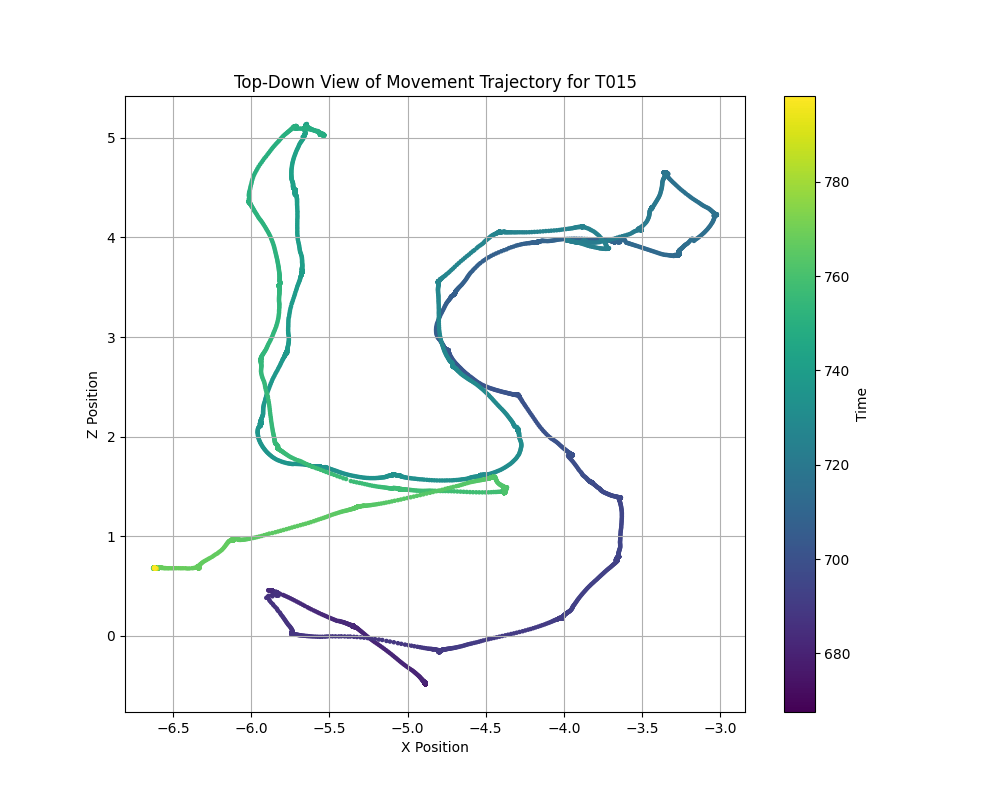

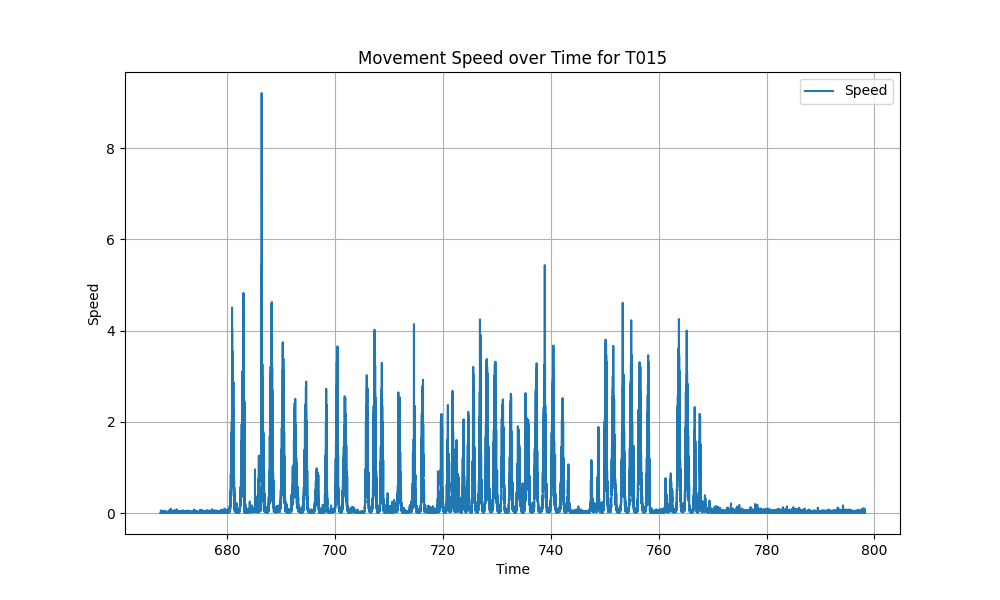

In [7]:
plot_movement_trajectory_with_speed(r'C:\Users\lal\Documents\tez\analysis\vr\vrtracking\trackerR_movement_T015.csv')

Area covered: 40.74%


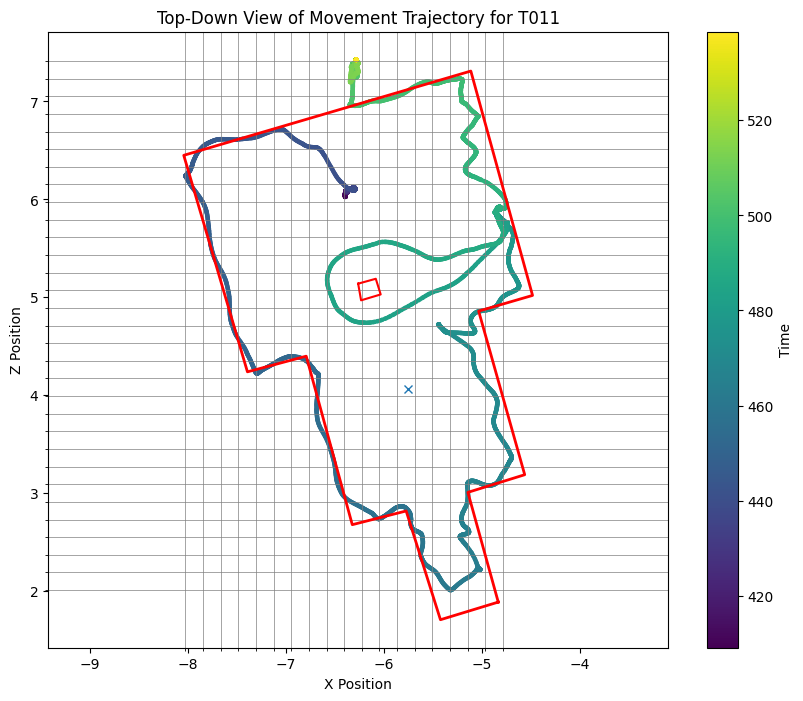

In [5]:
###latest

import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

def plot_movement_trajectory_with_layout(file_path):
    def draw_elevated_platform(ax):
        # Coordinates from the image
        platform_coords = [
            (-4.83, 1.89), (-5.42, 1.71), (-5.77, 2.82), (-6.32, 2.68),
            (-6.79, 4.40), (-7.39, 4.24), (-8.04, 6.45), (-5.11, 7.31),
            (-4.48, 5.02), (-5.03, 4.86), (-4.56, 3.19), (-5.14, 3.01),  
        ]
        # Drawing the elevated platform layout
        platform_coords.append(platform_coords[0])  # Close the loop
        xs, ys = zip(*platform_coords)
        ax.plot(xs, ys, 'r-', linewidth=2)
        
        ax.plot(-5.75, 4.06, 'x')  # Center point marked with 'x'  
        
        pillar_coords = [
        (-6.26, 5.14),  # Start here
        (-6.08, 5.19),  # Move right and slightly up
        (-6.03, 5.03),  # Move slightly right and down
        (-6.23, 4.97)   # Move left and slightly down to complete the shape
        ]

        # Drawing the pillars
        pillar_coords.append(pillar_coords[0])  # Close the loop
        pxs, pys = zip(*pillar_coords)
        ax.plot(pxs, pys, 'r-')

        # Calculate the size of the grid based on the pillar coordinates
        pillar_coords = np.array(pillar_coords)
        pillar_size = np.abs(pillar_coords[0] - pillar_coords[1]).max()

        # Get the minimum and maximum coordinates of the trajectory
        x_min, x_max = np.min(pos_x), np.max(pos_x)
        z_min, z_max = np.min(pos_z), np.max(pos_z)

        # Create a grid of lines based on the pillar size
        x_grid = np.arange(x_min, x_max, pillar_size)
        z_grid = np.arange(z_min, z_max, pillar_size)
        ax.set_xticks(x_grid, minor=True)
        ax.set_yticks(z_grid, minor=True)
        ax.grid(which='minor', color='gray', linestyle='-', linewidth=0.5)


        area_covered = calculate_area_covered(pos_x, pos_z, x_grid, z_grid)
        print(f"Area covered: {area_covered:.2f}%")

    def calculate_area_covered(pos_x, pos_z, x_grid, z_grid):
    # Initialize a boolean array to store the squares covered
        squares_covered = np.zeros((len(z_grid)-1, len(x_grid)-1), dtype=bool)

        # Iterate over each segment of the trajectory
        for i in range(len(pos_x) - 1):
            x1, z1 = pos_x[i], pos_z[i]
            x2, z2 = pos_x[i+1], pos_z[i+1]

            # Find the grid squares that the segment passes through
            x_idx1, x_idx2 = np.searchsorted(x_grid, [x1, x2])
            z_idx1, z_idx2 = np.searchsorted(z_grid, [z1, z2])

            # Mark the squares as covered
            if x_idx1 == x_idx2:
                squares_covered[min(z_idx1, z_idx2):max(z_idx1, z_idx2)+1, x_idx1-1:x_idx1+1] = True
            elif z_idx1 == z_idx2:
                squares_covered[z_idx1-1:z_idx1+1, min(x_idx1, x_idx2):max(x_idx1, x_idx2)+1] = True
            else:
                squares_covered[min(z_idx1, z_idx2):max(z_idx1, z_idx2)+1, min(x_idx1, x_idx2):max(x_idx1, x_idx2)+1] = True

        # Calculate the total number of squares and the number of squares covered
        total_squares = (len(z_grid) - 1) * (len(x_grid) - 1)
        covered_squares = np.sum(squares_covered)

        # Calculate the percentage of area covered
        percentage_covered = (covered_squares / total_squares) * 100

        return percentage_covered

    # Extract the scene identifier from the file path
    file_name = os.path.basename(file_path)
    scene_id = file_name.split('_')[2].split('.')[0]

    # Load the data from the CSV file
    movement_data = pd.read_csv(file_path)

    # Extract position coordinates and time
    pos_x = movement_data['pos_x']
    pos_z = movement_data['pos_z']
    time = movement_data['time']

    # Create a 2D plot with a trail effect viewed from above (X vs Z) using time for color gradient
    fig, ax = plt.subplots(figsize=(10, 8))
    sc = ax.scatter(pos_x, pos_z, c=time, cmap='viridis', s=5)
    plt.xlabel('X Position')
    plt.ylabel('Z Position')
    plt.title(f'Top-Down View of Movement Trajectory for {scene_id}')
    plt.colorbar(sc, label='Time')
    plt.grid(False)
    plt.axis('equal')

    # Draw the specific layout based on the scene identifier
    if scene_id == 'T011':
        draw_elevated_platform(ax)
    elif scene_id == 'T003':
        draw_training_room(ax)
    elif scene_id == 'T007':
        draw_empty_room(ax)
    elif scene_id == 'T015':
        draw_dark_maze_room(ax)

    plt.show()

def draw_training_room(ax):
    platform_coords = [
        (-4.79, 5.74), (-5.67, 9.17), (-8.89, 8.32), (-8.00, 4.91)
    ]
    platform_coords.append(platform_coords[0])  # Close the loop
    xs, ys = zip(*platform_coords)
    ax.plot(xs, ys, 'r-', linewidth=2)

def draw_empty_room(ax):
    pass

def draw_dark_maze_room(ax):
    pass

# Example usage
plot_movement_trajectory_with_layout(r'C:\Users\lal\Documents\tez\analysis\vr\pilotdatavr2\camera_movement_T011.csv')

In [27]:
import numpy as np

# Define platform coordinates
platform_coords = [(-4.83, 1.89), (-5.41, 1.73), (-5.74, 2.84), (-6.32, 2.68), (-6.65, 4.40), (-7.23, 4.24), (-7.56, 5.96), (-5.09, 7.31), (-4.45, 5.06), (-5.03, 4.90), (-4.56, 3.17), (-5.14, 3.01)]

# Function to calculate angle between two points
def calculate_angle(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    slope = (y2 - y1) / (x2 - x1)
    angle_degrees = np.degrees(np.arctan(slope))
    return angle_degrees

# Iterate through the points and calculate angles
angles = []
for i in range(len(platform_coords) - 1):
    point1 = platform_coords[i]
    point2 = platform_coords[i + 1]
    angle = calculate_angle(point1, point2)
    angles.append(angle)
    print(f"Angle between {point1} and {point2}: {angle:.2f} degrees")

Angle between (-4.83, 1.89) and (-5.41, 1.73): 15.42 degrees
Angle between (-5.41, 1.73) and (-5.74, 2.84): -73.44 degrees
Angle between (-5.74, 2.84) and (-6.32, 2.68): 15.42 degrees
Angle between (-6.32, 2.68) and (-6.65, 4.4): -79.14 degrees
Angle between (-6.65, 4.4) and (-7.23, 4.24): 15.42 degrees
Angle between (-7.23, 4.24) and (-7.56, 5.96): -79.14 degrees
Angle between (-7.56, 5.96) and (-5.09, 7.31): 28.66 degrees
Angle between (-5.09, 7.31) and (-4.45, 5.06): -74.12 degrees
Angle between (-4.45, 5.06) and (-5.03, 4.9): 15.42 degrees
Angle between (-5.03, 4.9) and (-4.56, 3.17): -74.80 degrees
Angle between (-4.56, 3.17) and (-5.14, 3.01): 15.42 degrees


Calculated tilt angle: -883.50 degrees
Area covered: 48.25%


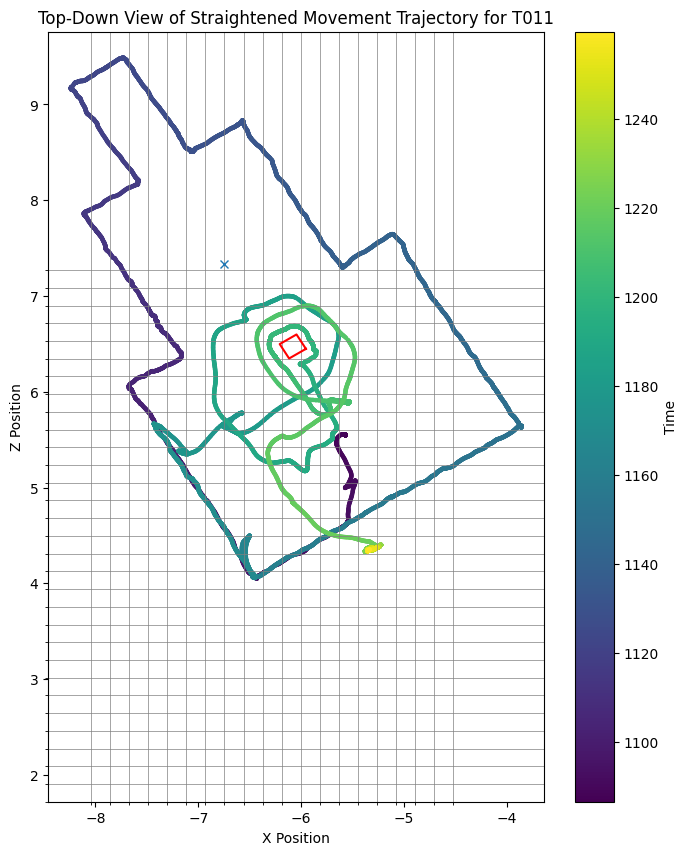

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

def calculate_tilt_angle(platform_coords):
    x1, z1 = platform_coords[0]
    x2, z2 = platform_coords[1]
    dx = x2 - x1
    dz = z2 - z1
    slope= dz/dx
    angle = np.arctan(slope)
    angle_deg = np.degrees(angle)
    #adjusted_angle = 90 - angle_deg
    return np.radians(-angle_deg)
    

def rotate_points(x, z, angle, center_x, center_z):
    x_centered = x - center_x
    z_centered = z - center_z
    x_rotated = x_centered * np.cos(angle) + z_centered * np.sin(angle)
    z_rotated = -x_centered * np.sin(angle) + z_centered * np.cos(angle)
    x_final = x_rotated + center_x
    z_final = z_rotated + center_z
    return x_final, z_final
    

def plot_movement_trajectory_with_layout(file_path):
    ''' 
    platform_coords = [
        (-4.83, 1.89), (-5.41, 1.73), (-5.74, 2.84), (-6.32, 2.68),
        (-6.81, 4.40), (-7.39, 4.24), (-8.03,6.48), (-5.09, 7.31),
        (-4.45, 5.06), (-5.03, 4.90), (-4.56, 3.17), (-5.14, 3.01),  
    ]
    '''
    
    platform_coords =  [
    (-5.16, 0.54),
    (-5.68, 0.23),
    (-6.29, 1.21),
    (-6.81, 0.90),
    (-7.73, 2.43),
    (-8.25, 2.12),
    (-9.46, 4.11),
    (-6.85, 5.69),
    (-5.64, 3.69),
    (-6.15, 3.39),
    (-5.24, 1.84),
    (-5.76, 1.53),
]
    

    def draw_elevated_platform(ax, angle, center_x, center_z):
        rotated_coords = [rotate_points(x, z, -angle, center_x, center_z) for x, z in platform_coords]
        rotated_coords.append(rotated_coords[0])
        xs, zs = zip(*rotated_coords)
        ax.plot(xs, zs, 'r-', linewidth=2)
        
        center_x_rotated, center_z_rotated = rotate_points(-5.75, 4.06, -angle, center_x, center_z)
        ax.plot(center_x_rotated, center_z_rotated, 'x')

        #pillar_coords = [ (-6.11, 4.90), (-6.32, 5.08), (-6.20, 5.24), (-5.98, 5.16)]

        pillar_coords = [
        (-6.26, 5.14),  # Start here
        (-6.075, 5.19),  # Move right and slightly up
        (-6.03, 5.02),  # Move slightly right and down
        (-6.215, 4.97)   # Move left and slightly down to complete the shape
        ]
        rotated_pillar = [rotate_points(x, z, -angle, center_x, center_z) for x, z in pillar_coords]
        rotated_pillar.append(rotated_pillar[0])
        pxs, pzs = zip(*rotated_pillar)
        ax.plot(pxs, pzs, 'r-')

        pillar_coords = np.array(pillar_coords)
        pillar_size = np.abs(pillar_coords[0] - pillar_coords[1]).max()

        x_min, x_max = np.min(pos_x), np.max(pos_x)
        z_min, z_max = np.min(pos_z), np.max(pos_z)

        x_grid = np.arange(x_min, x_max, pillar_size)
        z_grid = np.arange(z_min, z_max, pillar_size)
        ax.set_xticks(x_grid, minor=True)
        ax.set_yticks(z_grid, minor=True)
        ax.grid(which='minor', color='gray', linestyle='-', linewidth=0.5)

        area_covered = calculate_area_covered(pos_x, pos_z, x_grid, z_grid)
        print(f"Area covered: {area_covered:.2f}%")

    def calculate_area_covered(pos_x, pos_z, x_grid, z_grid):
        squares_covered = np.zeros((len(z_grid)-1, len(x_grid)-1), dtype=bool)
        for i in range(len(pos_x) - 1):
            x1, z1 = pos_x[i], pos_z[i]
            x2, z2 = pos_x[i+1], pos_z[i+1]
            x_idx1, x_idx2 = np.searchsorted(x_grid, [x1, x2])
            z_idx1, z_idx2 = np.searchsorted(z_grid, [z1, z2])
            if x_idx1 == x_idx2:
                squares_covered[min(z_idx1, z_idx2):max(z_idx1, z_idx2)+1, x_idx1-1:x_idx1+1] = True
            elif z_idx1 == z_idx2:
                squares_covered[z_idx1-1:z_idx1+1, min(x_idx1, x_idx2):max(x_idx1, x_idx2)+1] = True
            else:
                squares_covered[min(z_idx1, z_idx2):max(z_idx1, z_idx2)+1, min(x_idx1, x_idx2):max(x_idx1, x_idx2)+1] = True
        total_squares = (len(z_grid) - 1) * (len(x_grid) - 1)
        covered_squares = np.sum(squares_covered)
        percentage_covered = (covered_squares / total_squares) * 100
        return percentage_covered

    file_name = os.path.basename(file_path)
    scene_id = file_name.split('_')[2].split('.')[0]

    movement_data = pd.read_csv(file_path)
    pos_x = movement_data['pos_x']
    pos_z = movement_data['pos_z']
    time = movement_data['time']

    tilt_angle = calculate_tilt_angle(platform_coords)
    print(f"Calculated tilt angle: {np.degrees(tilt_angle):.2f} degrees")

    center_x = np.mean(pos_x)
    center_z = np.mean(pos_z)

    pos_x_rotated, pos_z_rotated = rotate_points(pos_x, pos_z, -tilt_angle, center_x, center_z)

    fig, ax = plt.subplots(figsize=(8, 10))
    sc = ax.scatter(pos_x_rotated, pos_z_rotated, c=time, cmap='viridis', s=5)
    plt.xlabel('X Position')
    plt.ylabel('Z Position')
    plt.title(f'Top-Down View of Straightened Movement Trajectory for {scene_id}')
    plt.colorbar(sc, label='Time')
    plt.grid(False)

    if scene_id == 'T011':
        draw_elevated_platform(ax, tilt_angle, center_x, center_z)
    elif scene_id == 'T003':
        draw_training_room(ax, tilt_angle, center_x, center_z)
    elif scene_id == 'T007':
        draw_empty_room(ax)
    elif scene_id == 'T015':
        draw_dark_maze_room(ax)

    plt.show()

def draw_training_room(ax, angle, center_x, center_z):
    
    platform_coords = [
        (-4.79, 5.74), (-5.67, 9.17), (-8.89, 8.32), (-8.00, 4.91)
    ]
    rotated_coords = [rotate_points(x, z, angle, center_x, center_z) for x, z in platform_coords]
    rotated_coords.append(rotated_coords[0])
    xs, zs = zip(*rotated_coords)
    ax.plot(xs, zs, 'r-', linewidth=2)

def draw_empty_room(ax):
    # No specific elements to draw for an empty room
    pass

def draw_dark_maze_room(ax):
    # Placeholder for dark maze room drawing
    # You would add specific maze elements here
    pass

# Example usage
plot_movement_trajectory_with_layout(r'C:\Users\lal\Documents\tez\analysis\BEA_edges_11.09.24\S001\trackers\camera_movement_T011.csv')

Calculated tilt angle: -15.95 degrees
Total area covered: 48.25%
Green area covered: 91.67%


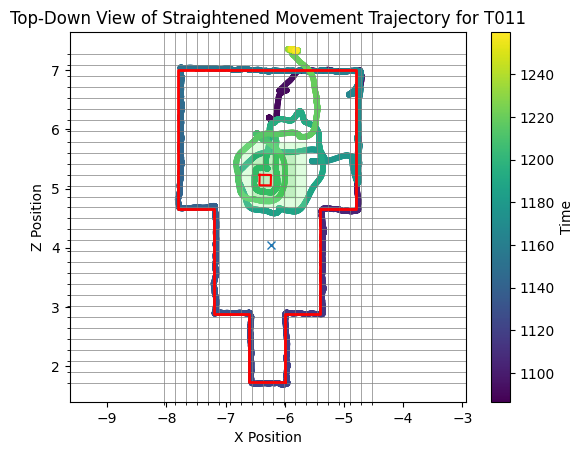

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

def calculate_tilt_angle(platform_coords):
    x1, z1 = platform_coords[0]
    x2, z2 = platform_coords[1]
    dx = x2 - x1
    dz = z2 - z1
    slope= dz/dx
    angle = np.arctan(slope)
    angle_deg = np.degrees(angle)
    return np.radians(-angle_deg)

def rotate_points(x, z, angle, center_x, center_z):
    x_centered = x - center_x
    z_centered = z - center_z
    x_rotated = x_centered * np.cos(angle) + z_centered * np.sin(angle)
    z_rotated = -x_centered * np.sin(angle) + z_centered * np.cos(angle)
    x_final = x_rotated + center_x
    z_final = z_rotated + center_z
    return x_final, z_final

def plot_movement_trajectory_with_layout(file_path):
    platform_coords = [
        (-4.83, 1.89), (-5.46, 1.71), (-5.77, 2.82), (-6.32, 2.68),
        (-6.79, 4.40), (-7.39, 4.24), (-8.04, 6.45), (-5.11, 7.31),
        (-4.48, 5.02), (-5.03, 4.86), (-4.56, 3.19), (-5.14, 3.01),  
    ]

    def draw_elevated_platform(ax, angle, center_x, center_z):
        #rotated_coords = [rotate_points(x, z, -angle, center_x, center_z) for x, z in platform_coords]
        rotated_coords = [(-6.00, 1.73), (-6.60, 1.73), (-6.60, 2.89), (-7.20, 2.89), (-7.20, 4.66), (-7.80, 4.66), (-7.80, 7.00), (-4.80, 7.00), (-4.80, 4.66), (-5.40, 4.66), (-5.40, 2.89), (-6.00, 2.89)]
        rotated_coords.append(rotated_coords[0])
        xs, zs = zip(*rotated_coords)
        ax.plot(xs, zs, 'r-', linewidth=2)
        
        center_x_rotated, center_z_rotated = rotate_points(-5.75, 4.06, -angle, center_x, center_z)
        ax.plot(center_x_rotated, center_z_rotated, 'x')

        pillar_coords = [
        (-6.26, 5.14),  # Start here
        (-6.075, 5.19),  # Move right and slightly up
        (-6.03, 5.02),  # Move slightly right and down
        (-6.215, 4.97)   # Move left and slightly down to complete the shape
        ]
        rotated_pillar = [rotate_points(x, z, -angle, center_x, center_z) for x, z in pillar_coords]
        rotated_pillar.append(rotated_pillar[0])
        pxs, pzs = zip(*rotated_pillar)
        ax.plot(pxs, pzs, 'r-')

        pillar_coords = np.array(pillar_coords)
        pillar_size = np.abs(pillar_coords[0] - pillar_coords[1]).max()

        x_min, x_max = np.min(pos_x), np.max(pos_x)
        z_min, z_max = np.min(pos_z), np.max(pos_z)

        x_grid = np.arange(x_min, x_max, pillar_size)
        z_grid = np.arange(z_min, z_max, pillar_size)
        ax.set_xticks(x_grid, minor=True)
        ax.set_yticks(z_grid, minor=True)
        ax.grid(which='minor', color='gray', linestyle='-', linewidth=0.5)

        pillar_center = np.mean(pillar_coords, axis=0)
        pillar_center_rotated = rotate_points(pillar_center[0], pillar_center[1], -angle, center_x, center_z)
        
        green_squares = highlight_adjacent_squares(ax, pillar_center_rotated, x_grid, z_grid, pillar_size)
        
        area_covered, green_area_covered = calculate_area_covered(pos_x, pos_z, x_grid, z_grid, green_squares)
        print(f"Total area covered: {area_covered:.2f}%")
        print(f"Green area covered: {green_area_covered:.2f}%")

    def highlight_adjacent_squares(ax, pillar_center, x_grid, z_grid, pillar_size):
        pillar_x_idx = np.searchsorted(x_grid, pillar_center[0])
        pillar_z_idx = np.searchsorted(z_grid, pillar_center[1])
        
        green_squares = []
        for i in range(-3, 3):  # Range from -3 to 2 (6x6 grid)
            for j in range(-3, 3):  # Range from -3 to 2 (6x6 grid)
                if -2 <= i <= 1 and -2 <= j <= 1:
                    color = 'limegreen'  # 4x4 center grid
                else:
                    color = 'palegreen'  # Outer squares of 5x5 grid  # Outer squares of 5x5 grid
                
                x = x_grid[pillar_x_idx + i]
                z = z_grid[pillar_z_idx + j]
                rect = plt.Rectangle((x, z), pillar_size, pillar_size, fill=True, color=color, alpha=0.3)
                ax.add_patch(rect)
                green_squares.append((pillar_x_idx + i, pillar_z_idx + j))
        
        return green_squares

    def calculate_area_covered(pos_x, pos_z, x_grid, z_grid, green_squares):
        squares_covered = np.zeros((len(z_grid)-1, len(x_grid)-1), dtype=bool)
        for i in range(len(pos_x) - 1):
            x1, z1 = pos_x[i], pos_z[i]
            x2, z2 = pos_x[i+1], pos_z[i+1]
            x_idx1, x_idx2 = np.searchsorted(x_grid, [x1, x2])
            z_idx1, z_idx2 = np.searchsorted(z_grid, [z1, z2])
            if x_idx1 == x_idx2:
                squares_covered[min(z_idx1, z_idx2):max(z_idx1, z_idx2)+1, x_idx1-1:x_idx1+1] = True
            elif z_idx1 == z_idx2:
                squares_covered[z_idx1-1:z_idx1+1, min(x_idx1, x_idx2):max(x_idx1, x_idx2)+1] = True
            else:
                squares_covered[min(z_idx1, z_idx2):max(z_idx1, z_idx2)+1, min(x_idx1, x_idx2):max(x_idx1, x_idx2)+1] = True
        
        total_squares = (len(z_grid) - 1) * (len(x_grid) - 1)
        covered_squares = np.sum(squares_covered)
        percentage_covered = (covered_squares / total_squares) * 100

        green_covered = sum(squares_covered[z, x] for x, z in green_squares)
        green_percentage_covered = (green_covered / len(green_squares)) * 100
        
        return percentage_covered, green_percentage_covered

    file_name = os.path.basename(file_path)
    scene_id = file_name.split('_')[2].split('.')[0]

    movement_data = pd.read_csv(file_path)
    pos_x = movement_data['pos_x']
    pos_z = movement_data['pos_z']
    time = movement_data['time']

    tilt_angle = calculate_tilt_angle(platform_coords)
    print(f"Calculated tilt angle: {np.degrees(tilt_angle):.2f} degrees")

    center_x = np.mean(pos_x)
    center_z = np.mean(pos_z)

    pos_x_rotated, pos_z_rotated = rotate_points(pos_x, pos_z, -tilt_angle, center_x, center_z)

    fig, ax = plt.subplots(figsize=(8, 10))
    sc = ax.scatter(pos_x_rotated, pos_z_rotated, c=time, cmap='viridis', s=10)
    plt.xlabel('X Position')
    plt.ylabel('Z Position')
    plt.title(f'Top-Down View of Straightened Movement Trajectory for {scene_id}')
    plt.colorbar(sc, label='Time')
    plt.grid(False)
    plt.axis('equal')

    if scene_id == 'T011':
        draw_elevated_platform(ax, tilt_angle, center_x, center_z)
    elif scene_id == 'T003':
        draw_training_room(ax, tilt_angle, center_x, center_z)
    elif scene_id == 'T007':
        draw_empty_room(ax)
    elif scene_id == 'T015':
        draw_dark_maze_room(ax)

    plt.show()

def draw_training_room(ax, angle, center_x, center_z):
    platform_coords = [
        (-4.79, 5.74), (-5.67, 9.17), (-8.89, 8.32), (-8.00, 4.91)
    ]
    rotated_coords = [rotate_points(x, z, angle, center_x, center_z) for x, z in platform_coords]
    rotated_coords.append(rotated_coords[0])
    xs, zs = zip(*rotated_coords)
    ax.plot(xs, zs, 'r-', linewidth=2)

def draw_empty_room(ax):
    pass

def draw_dark_maze_room(ax):
    pass

# Example usage

plot_movement_trajectory_with_layout(r'C:\Users\lal\Documents\tez\analysis\BEA_edges_11.09.24\S001\trackers\camera_movement_T011.csv')


Calculated tilt angle: -15.95 degrees
-5.993039335535007 5.985490316431258
Total area covered: 26.57%
Green area covered: 56.67%


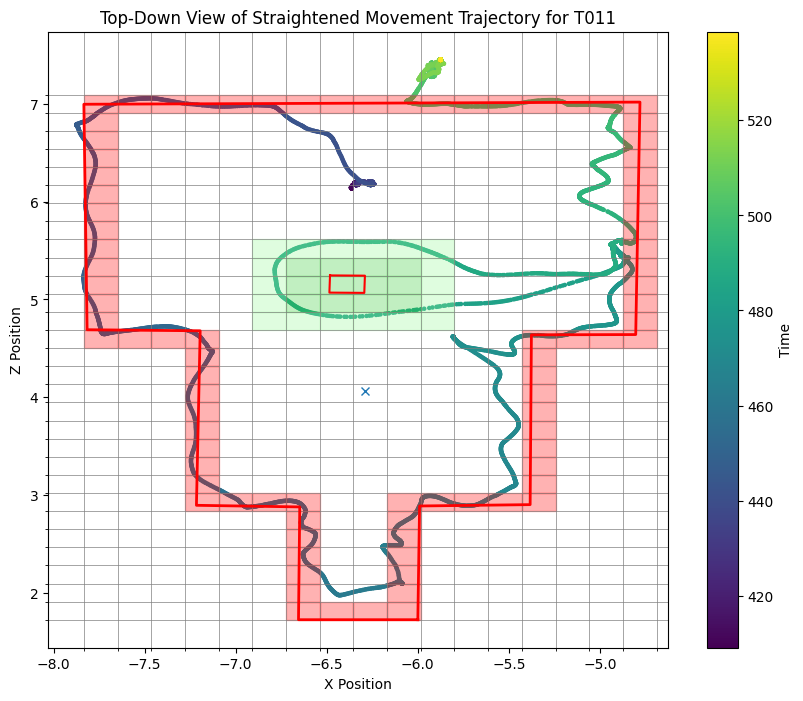

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from matplotlib.path import Path
from matplotlib.patches import Rectangle

def calculate_tilt_angle(platform_coords):
    x1, z1 = platform_coords[0]
    x2, z2 = platform_coords[1]
    dx = x2 - x1
    dz = z2 - z1
    slope = dz / dx
    angle = np.arctan(slope)
    angle_deg = np.degrees(angle)
    return np.radians(-angle_deg)

def rotate_points(x, z, angle, center_x, center_z):
    x_centered = x - center_x
    z_centered = z - center_z
    x_rotated = x_centered * np.cos(angle) + z_centered * np.sin(angle)
    z_rotated = -x_centered * np.sin(angle) + z_centered * np.cos(angle)
    x_final = x_rotated + center_x
    z_final = z_rotated + center_z
    return x_final, z_final

def plot_movement_trajectory_with_layout(file_path):
    platform_coords = [
        (-4.83, 1.89), (-5.46, 1.71), (-5.77, 2.82), (-6.32, 2.68),
        (-6.79, 4.40), (-7.39, 4.24), (-8.04, 6.45), (-5.11, 7.31),
        (-4.48, 5.02), (-5.03, 4.86), (-4.56, 3.19), (-5.14, 3.01),
    ]

    def draw_elevated_platform(ax, angle, center_x, center_z):
        # Rotate platform coordinates
        rotated_coords = [rotate_points(x, z, -angle, center_x, center_z) for x, z in platform_coords]
        rotated_coords.append(rotated_coords[0])  # Close the polygon
        xs, zs = zip(*rotated_coords)
        ax.plot(xs, zs, 'r-', linewidth=2)

        # Plot the center of the platform
        center_x_rotated, center_z_rotated = rotate_points(-5.75, 4.06, -angle, center_x, center_z)
        ax.plot(center_x_rotated, center_z_rotated, 'x')

        # Define pillar coordinates and rotate them
        pillar_coords = [
            (-6.26, 5.14),
            (-6.075, 5.19),
            (-6.03, 5.02),
            (-6.215, 4.97)
        ]
        rotated_pillar = [rotate_points(x, z, -angle, center_x, center_z) for x, z in pillar_coords]
        rotated_pillar.append(rotated_pillar[0])  # Close the polygon
        pxs, pzs = zip(*rotated_pillar)
        ax.plot(pxs, pzs, 'r-')

        # Calculate pillar size for grid spacing
        pillar_coords_array = np.array(pillar_coords)
        pillar_size = np.abs(pillar_coords_array[0] - pillar_coords_array[1]).max()

        # Define grid based on the rotated platform coordinates
        x_min, x_max = np.min(xs), np.max(xs)
        z_min, z_max = np.min(zs), np.max(zs)

        x_grid = np.arange(x_min, x_max + pillar_size, pillar_size)
        z_grid = np.arange(z_min, z_max + pillar_size, pillar_size)
        ax.set_xticks(x_grid, minor=True)
        ax.set_yticks(z_grid, minor=True)
        ax.grid(which='minor', color='gray', linestyle='-', linewidth=0.5)

        # Create a Path object for the platform polygon
        platform_path = Path(list(zip(xs, zs)))

        # Highlight grid squares that intersect with platform edges in red
        for x_idx in range(len(x_grid) - 1):
            for z_idx in range(len(z_grid) - 1):
                x = x_grid[x_idx]
                z = z_grid[z_idx]
                square_path = Path([
                    (x, z),
                    (x + pillar_size, z),
                    (x + pillar_size, z + pillar_size),
                    (x, z + pillar_size),
                    (x, z)
                ])
                # Check for intersection with platform edges
                if platform_path.intersects_path(square_path, filled=False):
                    rect = plt.Rectangle((x, z), pillar_size, pillar_size, fill=True, color='red', alpha=0.3)
                    ax.add_patch(rect)

        # Calculate the center of the pillar for highlighting adjacent squares
        pillar_center = np.mean(pillar_coords_array, axis=0)
        pillar_center_rotated = rotate_points(pillar_center[0], pillar_center[1], -angle, center_x, center_z)

        green_squares = highlight_adjacent_squares(ax, pillar_center_rotated, x_grid, z_grid, pillar_size)

        area_covered, green_area_covered = calculate_area_covered(
            pos_x_rotated, pos_z_rotated, x_grid, z_grid, green_squares)
        print(f"Total area covered: {area_covered:.2f}%")
        print(f"Green area covered: {green_area_covered:.2f}%")

    def highlight_adjacent_squares(ax, pillar_center, x_grid, z_grid, pillar_size):
        pillar_x_idx = np.searchsorted(x_grid, pillar_center[0]) - 1
        pillar_z_idx = np.searchsorted(z_grid, pillar_center[1]) - 1

        green_squares = []
        for i in range(-3, 3):  # Range from -3 to 2 (6x6 grid)
            for j in range(-3, 2):  # Range from -3 to 2 (6x6 grid)
                if -2<= i <= 1 and -2 <= j <= 0:
                    color = 'limegreen'  # 4x4 center grid
                else:
                    color = 'palegreen'  # Outer squares of 5x5 grid

                x_idx = pillar_x_idx + i + 1
                z_idx = pillar_z_idx + j + 1

                # Ensure indices are within grid bounds
                if 0 <= x_idx < len(x_grid) - 1 and 0 <= z_idx < len(z_grid) - 1:
                    x = x_grid[x_idx]
                    z = z_grid[z_idx]
                    rect = plt.Rectangle((x, z), pillar_size, pillar_size, fill=True, color=color, alpha=0.3)
                    ax.add_patch(rect)
                    green_squares.append((z_idx, x_idx))

        return green_squares

    def calculate_area_covered(pos_x, pos_z, x_grid, z_grid, green_squares):
        squares_covered = np.zeros((len(z_grid) - 1, len(x_grid) - 1), dtype=bool)
        for i in range(len(pos_x) - 1):
            x1, z1 = pos_x[i], pos_z[i]
            x2, z2 = pos_x[i + 1], pos_z[i + 1]
            x_idx1 = np.searchsorted(x_grid, x1) - 1
            x_idx2 = np.searchsorted(x_grid, x2) - 1
            z_idx1 = np.searchsorted(z_grid, z1) - 1
            z_idx2 = np.searchsorted(z_grid, z2) - 1

            # Ensure indices are within grid bounds
            x_idx1 = np.clip(x_idx1, 0, len(x_grid) - 2)
            x_idx2 = np.clip(x_idx2, 0, len(x_grid) - 2)
            z_idx1 = np.clip(z_idx1, 0, len(z_grid) - 2)
            z_idx2 = np.clip(z_idx2, 0, len(z_grid) - 2)

            min_x_idx = min(x_idx1, x_idx2)
            max_x_idx = max(x_idx1, x_idx2)
            min_z_idx = min(z_idx1, z_idx2)
            max_z_idx = max(z_idx1, z_idx2)

            squares_covered[min_z_idx:max_z_idx + 1, min_x_idx:max_x_idx + 1] = True

        total_squares = (len(z_grid) - 1) * (len(x_grid) - 1)
        covered_squares = np.sum(squares_covered)
        percentage_covered = (covered_squares / total_squares) * 100

        green_covered = sum(squares_covered[z, x] for z, x in green_squares)
        green_percentage_covered = (green_covered / len(green_squares)) * 100

        return percentage_covered, green_percentage_covered

    def draw_training_room(ax, angle, center_x, center_z):
        platform_coords = [
            (-4.79, 5.74), (-5.67, 9.17), (-8.89, 8.32), (-8.00, 4.91)
        ]
        rotated_coords = [rotate_points(x, z, angle, center_x, center_z) for x, z in platform_coords]
        rotated_coords.append(rotated_coords[0])
        xs, zs = zip(*rotated_coords)
        ax.plot(xs, zs, 'r-', linewidth=2)
        # Removed ax.fill to comply with your request

    def draw_empty_room(ax):
        empty_room_coords=np.array([[-8.30, 8.87], [-4.70, 8.87], [-4.70, 1.87], [-8.30, 1.87]])
        pass

    def draw_dark_maze_room(ax):
        pass

    # Extract scene ID from file name
    file_name = os.path.basename(file_path)
    scene_id = file_name.split('_')[2].split('.')[0]

    # Read movement data
    movement_data = pd.read_csv(file_path)
    pos_x = movement_data['pos_x']
    pos_z = movement_data['pos_z']
    time = movement_data['time']

    # Calculate tilt angle
    tilt_angle = calculate_tilt_angle(platform_coords)
    print(f"Calculated tilt angle: {np.degrees(tilt_angle):.2f} degrees")

    # Calculate center for rotation
    center_x = np.mean(pos_x)
    center_z = np.mean(pos_z)
    print(center_x, center_z)

    # Rotate positions
    pos_x_rotated, pos_z_rotated = rotate_points(pos_x, pos_z, -tilt_angle, center_x, center_z)

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 8))
    sc = ax.scatter(pos_x_rotated, pos_z_rotated, c=time, cmap='viridis', s=5)
    plt.xlabel('X Position')
    plt.ylabel('Z Position')
    plt.title(f'Top-Down View of Straightened Movement Trajectory for {scene_id}')
    plt.colorbar(sc, label='Time')
    plt.grid(False)

    # Draw the appropriate layout based on the scene ID
    if scene_id == 'T011':
        draw_elevated_platform(ax, tilt_angle, center_x, center_z)
    elif scene_id == 'T003':
        draw_training_room(ax, tilt_angle, center_x, center_z)
    elif scene_id == 'T007':
        draw_empty_room(ax)
    elif scene_id == 'T015':
        draw_dark_maze_room(ax)

    plt.show()

# Example usage
plot_movement_trajectory_with_layout(r'C:\Users\lal\Documents\tez\analysis\vr\pilotdatavr2\camera_movement_T011.csv')


Calculated tilt angle: -15.95 degrees
Total area covered: 25.27%
Limegreen area covered: 56.00%


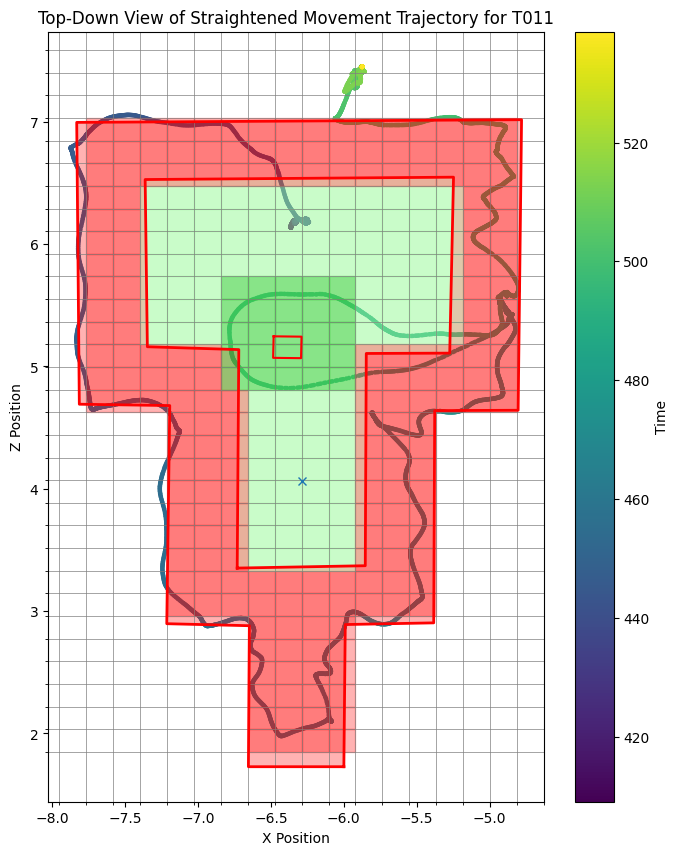

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from matplotlib.path import Path
from matplotlib.patches import Rectangle, PathPatch

def calculate_tilt_angle(platform_coords):
    x1, z1 = platform_coords[0]
    x2, z2 = platform_coords[1]
    dx = x2 - x1
    dz = z2 - z1
    slope = dz / dx
    angle = np.arctan(slope)
    angle_deg = np.degrees(angle)
    return np.radians(-angle_deg)

def rotate_points(x, z, angle, center_x, center_z):
    x_centered = x - center_x
    z_centered = z - center_z
    x_rotated = x_centered * np.cos(angle) + z_centered * np.sin(angle)
    z_rotated = -x_centered * np.sin(angle) + z_centered * np.cos(angle)
    x_final = x_rotated + center_x
    z_final = z_rotated + center_z
    return x_final, z_final

def plot_movement_trajectory_with_layout(file_path):
    platform_coords = [
        (-4.83, 1.89), (-5.46, 1.71), (-5.77, 2.82), (-6.32, 2.68),
        (-6.79, 4.40), (-7.39, 4.24), (-8.04, 6.45), (-5.11, 7.31),
        (-4.48, 5.02), (-5.03, 4.86), (-4.56, 3.19), (-5.14, 3.01),
    ]
    inner_platform_coords = [
        (-5.98, 3.25), (-6.46, 4.97), (-7.07, 4.82), (-7.46, 6.13),
        (-5.43, 6.73), (-5.06, 5.34), (-5.61, 5.18), (-5.14, 3.51)
    ]

    def draw_elevated_platform(ax, angle, center_x, center_z):
        # Rotate outer platform coordinates
        rotated_outer_coords = [rotate_points(x, z, -angle, center_x, center_z) for x, z in platform_coords]
        rotated_outer_coords.append(rotated_outer_coords[0])  # Close the polygon
        xs, zs = zip(*rotated_outer_coords)
        ax.plot(xs, zs, 'r-', linewidth=2)

        # Rotate inner platform coordinates
        rotated_inner_coords = [rotate_points(x, z, -angle, center_x, center_z) for x, z in inner_platform_coords]
        rotated_inner_coords.append(rotated_inner_coords[0])  # Close the polygon
        inner_xs, inner_zs = zip(*rotated_inner_coords)
        ax.plot(inner_xs, inner_zs, 'r-', linewidth=2)

        # Create Path objects for outer and inner platforms
        outer_path = Path(rotated_outer_coords)
        inner_path = Path(rotated_inner_coords)

        # Create combined path for the area between outer and inner platforms
        def create_combined_path(outer_coords, inner_coords):
            outer_vertices = np.array(outer_coords)
            outer_codes = np.ones(len(outer_vertices), dtype=Path.code_type) * Path.LINETO
            outer_codes[0] = Path.MOVETO

            inner_vertices = np.array(inner_coords)[::-1]  # Reverse inner vertices
            inner_codes = np.ones(len(inner_vertices), dtype=Path.code_type) * Path.LINETO
            inner_codes[0] = Path.MOVETO

            vertices = np.concatenate([outer_vertices, inner_vertices])
            codes = np.concatenate([outer_codes, inner_codes])

            combined_path = Path(vertices, codes)
            return combined_path

        combined_path = create_combined_path(rotated_outer_coords, rotated_inner_coords)

        # Create PathPatch for combined area and fill with red
        red_patch = PathPatch(combined_path, facecolor='red', edgecolor='none', alpha=0.3)
        ax.add_patch(red_patch)

        # Create PathPatch for inner platform and fill with pale green
        inner_patch = PathPatch(inner_path, facecolor='palegreen', edgecolor='none', alpha=0.3)
        ax.add_patch(inner_patch)

        # Plot the center of the platform
        center_x_rotated, center_z_rotated = rotate_points(-5.75, 4.06, -angle, center_x, center_z)
        ax.plot(center_x_rotated, center_z_rotated, 'x')

        # Define pillar coordinates and rotate them
        pillar_coords = [
            (-6.26, 5.14),
            (-6.075, 5.19),
            (-6.03, 5.02),
            (-6.215, 4.97)
        ]
        rotated_pillar = [rotate_points(x, z, -angle, center_x, center_z) for x, z in pillar_coords]
        rotated_pillar.append(rotated_pillar[0])  # Close the polygon
        pxs, pzs = zip(*rotated_pillar)
        ax.plot(pxs, pzs, 'r-')

        # Calculate pillar size for grid spacing
        pillar_coords_array = np.array(pillar_coords)
        pillar_size = np.abs(pillar_coords_array[0] - pillar_coords_array[1]).max()

        # Define grid over the entire plot area
        x_min = np.floor(np.min(pos_x_rotated) / pillar_size) * pillar_size
        x_max = np.ceil(np.max(pos_x_rotated) / pillar_size) * pillar_size
        z_min = np.floor(np.min(pos_z_rotated) / pillar_size) * pillar_size
        z_max = np.ceil(np.max(pos_z_rotated) / pillar_size) * pillar_size

        x_grid = np.arange(x_min, x_max + pillar_size, pillar_size)
        z_grid = np.arange(z_min, z_max + pillar_size, pillar_size)
        ax.set_xticks(x_grid, minor=True)
        ax.set_yticks(z_grid, minor=True)
        ax.grid(which='minor', color='gray', linestyle='-', linewidth=0.5)

        # Initialize lists to keep track of squares
        red_squares = []
        palegreen_squares = []
        limegreen_squares = []

        # Calculate the center of the pillar for highlighting adjacent squares
        pillar_center = np.mean(pillar_coords_array, axis=0)
        pillar_center_rotated = rotate_points(pillar_center[0], pillar_center[1], -angle, center_x, center_z)

        # Highlight the limegreen area around the pillar
        limegreen_squares = highlight_adjacent_squares(ax, pillar_center_rotated, x_grid, z_grid, pillar_size)

        # Highlight grid squares
        for x_idx in range(len(x_grid) - 1):
            for z_idx in range(len(z_grid) - 1):
                x = x_grid[x_idx]
                z = z_grid[z_idx]
                x_center = x + pillar_size / 2
                z_center = z + pillar_size / 2

                # Skip if the square is already limegreen
                if (z_idx, x_idx) in limegreen_squares:
                    continue

                point = (x_center, z_center)
                in_outer = outer_path.contains_point(point)
                in_inner = inner_path.contains_point(point)

                if in_outer and not in_inner:
                    # Square is between outer and inner platforms
                    rect = plt.Rectangle((x, z), pillar_size, pillar_size, fill=True, color='red', alpha=0.3)
                    ax.add_patch(rect)
                    red_squares.append((z_idx, x_idx))
                elif in_inner:
                    # Square is inside inner platform
                    rect = plt.Rectangle((x, z), pillar_size, pillar_size, fill=True, color='palegreen', alpha=0.3)
                    ax.add_patch(rect)
                    palegreen_squares.append((z_idx, x_idx))
                else:
                    # Square is outside both platforms; do not fill
                    pass

        # Calculate area coverage
        area_covered, limegreen_area_covered = calculate_area_covered(
            pos_x_rotated, pos_z_rotated, x_grid, z_grid, limegreen_squares)
        print(f"Total area covered: {area_covered:.2f}%")
        print(f"Limegreen area covered: {limegreen_area_covered:.2f}%")

    def highlight_adjacent_squares(ax, pillar_center, x_grid, z_grid, pillar_size):
        x_min = x_grid[0]
        z_min = z_grid[0]
        pillar_x_idx = int(round((pillar_center[0] - x_min) / pillar_size))
        pillar_z_idx = int(round((pillar_center[1] - z_min) / pillar_size))

        limegreen_squares = []
        for i in range(-2, 3):  # Range from -2 to 2 (5x5 grid)
            for j in range(-2, 3):  # Range from -2 to 2 (5x5 grid)
                color = 'limegreen'  # Limegreen area

                x_idx = pillar_x_idx + i
                z_idx = pillar_z_idx + j

                # Ensure indices are within grid bounds
                if 0 <= x_idx < len(x_grid) - 1 and 0 <= z_idx < len(z_grid) - 1:
                    x = x_grid[x_idx]
                    z = z_grid[z_idx]
                    rect = plt.Rectangle((x, z), pillar_size, pillar_size, fill=True, color=color, alpha=0.5)
                    ax.add_patch(rect)
                    limegreen_squares.append((z_idx, x_idx))

        return limegreen_squares

    def calculate_area_covered(pos_x, pos_z, x_grid, z_grid, limegreen_squares):
        squares_covered = np.zeros((len(z_grid) - 1, len(x_grid) - 1), dtype=bool)
        for i in range(len(pos_x) - 1):
            x1, z1 = pos_x[i], pos_z[i]
            x2, z2 = pos_x[i + 1], pos_z[i + 1]
            x_idx1 = int((x1 - x_grid[0]) / (x_grid[1] - x_grid[0]))
            x_idx2 = int((x2 - x_grid[0]) / (x_grid[1] - x_grid[0]))
            z_idx1 = int((z1 - z_grid[0]) / (z_grid[1] - z_grid[0]))
            z_idx2 = int((z2 - z_grid[0]) / (z_grid[1] - z_grid[0]))

            # Ensure indices are within grid bounds
            x_idx1 = np.clip(x_idx1, 0, len(x_grid) - 2)
            x_idx2 = np.clip(x_idx2, 0, len(x_grid) - 2)
            z_idx1 = np.clip(z_idx1, 0, len(z_grid) - 2)
            z_idx2 = np.clip(z_idx2, 0, len(z_grid) - 2)

            min_x_idx = min(x_idx1, x_idx2)
            max_x_idx = max(x_idx1, x_idx2)
            min_z_idx = min(z_idx1, z_idx2)
            max_z_idx = max(z_idx1, z_idx2)

            squares_covered[min_z_idx:max_z_idx + 1, min_x_idx:max_x_idx + 1] = True

        # Total squares is the sum of red, palegreen, and limegreen squares
        total_squares = np.sum(squares_covered)
        total_possible_squares = (len(z_grid) - 1) * (len(x_grid) - 1)
        percentage_covered = (total_squares / total_possible_squares) * 100

        limegreen_covered = sum(squares_covered[z, x] for z, x in limegreen_squares)
        limegreen_percentage_covered = (limegreen_covered / len(limegreen_squares)) * 100

        return percentage_covered, limegreen_percentage_covered

    def draw_training_room(ax, angle, center_x, center_z):
        platform_coords = [
            (-4.79, 5.74), (-5.67, 9.17), (-8.89, 8.32), (-8.00, 4.91)
        ]
        rotated_coords = [rotate_points(x, z, angle, center_x, center_z) for x, z in platform_coords]
        rotated_coords.append(rotated_coords[0])
        xs, zs = zip(*rotated_coords)
        ax.plot(xs, zs, 'r-', linewidth=2)
        # Removed ax.fill to comply with your request

    def draw_empty_room(ax):
        pass

    def draw_dark_maze_room(ax):
        pass

    # Extract scene ID from file name
    file_name = os.path.basename(file_path)
    scene_id = file_name.split('_')[2].split('.')[0]

    # Read movement data
    movement_data = pd.read_csv(file_path)
    pos_x = movement_data['pos_x']
    pos_z = movement_data['pos_z']
    time = movement_data['time']

    # Calculate tilt angle
    tilt_angle = calculate_tilt_angle(platform_coords)
    print(f"Calculated tilt angle: {np.degrees(tilt_angle):.2f} degrees")

    # Calculate center for rotation
    center_x = np.mean(pos_x)
    center_z = np.mean(pos_z)

    # Rotate positions
    pos_x_rotated, pos_z_rotated = rotate_points(pos_x, pos_z, -tilt_angle, center_x, center_z)

    # Plotting
    fig, ax = plt.subplots(figsize=(8, 10))
    sc = ax.scatter(pos_x_rotated, pos_z_rotated, c=time, cmap='viridis', s=5)
    plt.xlabel('X Position')
    plt.ylabel('Z Position')
    plt.title(f'Top-Down View of Straightened Movement Trajectory for {scene_id}')
    plt.colorbar(sc, label='Time')
    plt.grid(False)

    # Draw the appropriate layout based on the scene ID
    if scene_id == 'T011':
        draw_elevated_platform(ax, tilt_angle, center_x, center_z)
    elif scene_id == 'T003':
        draw_training_room(ax, tilt_angle, center_x, center_z)
    elif scene_id == 'T007':
        draw_empty_room(ax)
    elif scene_id == 'T015':
        draw_dark_maze_room(ax)

    plt.show()

# Example usage
plot_movement_trajectory_with_layout(r'C:\Users\lal\Documents\tez\analysis\vr\pilotdatavr2\camera_movement_T011.csv')


Calculated tilt angle: -15.95 degrees
Total area covered: 26.57%
Green area covered: 15.53%


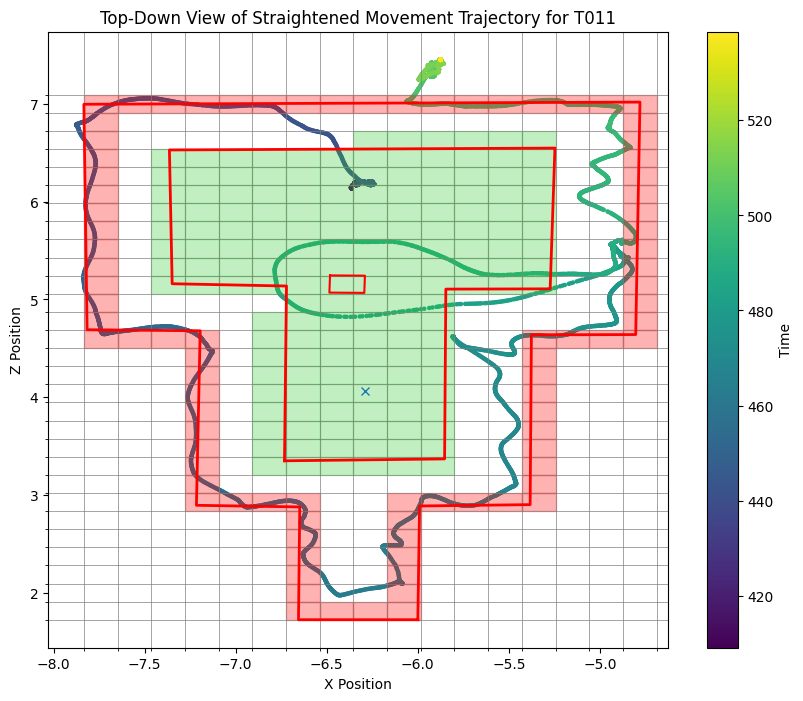

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from matplotlib.path import Path
from matplotlib.patches import Rectangle

def calculate_tilt_angle(platform_coords):
    x1, z1 = platform_coords[0]
    x2, z2 = platform_coords[1]
    dx = x2 - x1
    dz = z2 - z1
    slope = dz / dx
    angle = np.arctan(slope)
    angle_deg = np.degrees(angle)
    return np.radians(-angle_deg)

def rotate_points(x, z, angle, center_x, center_z):
    x_centered = x - center_x
    z_centered = z - center_z
    x_rotated = x_centered * np.cos(angle) + z_centered * np.sin(angle)
    z_rotated = -x_centered * np.sin(angle) + z_centered * np.cos(angle)
    x_final = x_rotated + center_x
    z_final = z_rotated + center_z
    return x_final, z_final

def plot_movement_trajectory_with_layout(file_path):
    platform_coords = [
        (-4.83, 1.89), (-5.46, 1.71), (-5.77, 2.82), (-6.32, 2.68),
        (-6.79, 4.40), (-7.39, 4.24), (-8.04, 6.45), (-5.11, 7.31),
        (-4.48, 5.02), (-5.03, 4.86), (-4.56, 3.19), (-5.14, 3.01),
    ]

    inner_platform_coords = [
        (-5.98, 3.25), (-6.46, 4.97), (-7.07, 4.82), (-7.46, 6.13),
        (-5.43, 6.73), (-5.06, 5.34), (-5.61, 5.18), (-5.14, 3.51)
    ]

    def draw_elevated_platform(ax, angle, center_x, center_z):
        # Rotate platform coordinates
        rotated_coords = [rotate_points(x, z, -angle, center_x, center_z) for x, z in platform_coords]
        rotated_coords.append(rotated_coords[0])  # Close the polygon
        xs, zs = zip(*rotated_coords)
        ax.plot(xs, zs, 'r-', linewidth=2)

        # Rotate inner platform coordinates
        rotated_inner_coords = [rotate_points(x, z, -angle, center_x, center_z) for x, z in inner_platform_coords]
        rotated_inner_coords.append(rotated_inner_coords[0])  # Close the polygon
        inner_xs, inner_zs = zip(*rotated_inner_coords)
        ax.plot(inner_xs, inner_zs, 'r-', linewidth=2)

        # Plot the center of the platform
        center_x_rotated, center_z_rotated = rotate_points(-5.75, 4.06, -angle, center_x, center_z)
        ax.plot(center_x_rotated, center_z_rotated, 'x')

        # Define pillar coordinates and rotate them
        pillar_coords = [
            (-6.26, 5.14),
            (-6.075, 5.19),
            (-6.03, 5.02),
            (-6.215, 4.97)
        ]
        rotated_pillar = [rotate_points(x, z, -angle, center_x, center_z) for x, z in pillar_coords]
        rotated_pillar.append(rotated_pillar[0])  # Close the polygon
        pxs, pzs = zip(*rotated_pillar)
        ax.plot(pxs, pzs, 'r-')

        # Calculate pillar size for grid spacing
        pillar_coords_array = np.array(pillar_coords)
        pillar_size = np.abs(pillar_coords_array[0] - pillar_coords_array[1]).max()

        # Define grid based on the rotated platform coordinates
        x_min, x_max = np.min(xs), np.max(xs)
        z_min, z_max = np.min(zs), np.max(zs)

        x_grid = np.arange(x_min, x_max + pillar_size, pillar_size)
        z_grid = np.arange(z_min, z_max + pillar_size, pillar_size)
        ax.set_xticks(x_grid, minor=True)
        ax.set_yticks(z_grid, minor=True)
        ax.grid(which='minor', color='gray', linestyle='-', linewidth=0.5)

        # Create a Path object for the platform polygon
        platform_path = Path(list(zip(xs, zs)))

        # Create a Path object for the inner platform polygon
        inner_platform_path = Path(list(zip(inner_xs, inner_zs)))

        # Highlight grid squares that intersect with platform edges in red
        for x_idx in range(len(x_grid) - 1):
            for z_idx in range(len(z_grid) - 1):
                x = x_grid[x_idx]
                z = z_grid[z_idx]
                square_path = Path([
                    (x, z),
                    (x + pillar_size, z),
                    (x + pillar_size, z + pillar_size),
                    (x, z + pillar_size),
                    (x, z)
                ])
                # Check for intersection with outer platform edges and inner platform edges
                if platform_path.intersects_path(square_path, filled=False) and not inner_platform_path.contains_path(square_path):
                    rect = plt.Rectangle((x, z), pillar_size, pillar_size, fill=True, color='red', alpha=0.3)
                    ax.add_patch(rect)

        # Highlight grid squares inside the inner platform in green
        green_squares = highlight_adjacent_squares(ax, inner_xs, inner_zs, x_grid, z_grid, pillar_size)

        area_covered, green_area_covered = calculate_area_covered(
            pos_x_rotated, pos_z_rotated, x_grid, z_grid, green_squares)
        print(f"Total area covered: {area_covered:.2f}%")
        print(f"Green area covered: {green_area_covered:.2f}%")

    def highlight_adjacent_squares(ax, inner_xs, inner_zs, x_grid, z_grid, pillar_size):
        green_squares = []
        for x_idx in range(len(x_grid) - 1):
            for z_idx in range(len(z_grid) - 1):
                x = x_grid[x_idx]
                z = z_grid[z_idx]
                square_path = Path([
                    (x, z),
                    (x + pillar_size, z),
                    (x + pillar_size, z + pillar_size),
                    (x, z + pillar_size),
                    (x, z)
                ])
                # Check if the square is inside the inner platform
                if square_path.intersects_path(Path(list(zip(inner_xs, inner_zs)))):
                    rect = plt.Rectangle((x, z), pillar_size, pillar_size, fill=True, color='limegreen', alpha=0.3)
                    ax.add_patch(rect)
                    green_squares.append((z_idx, x_idx))

        return green_squares

    def calculate_area_covered(pos_x, pos_z, x_grid, z_grid, green_squares):
        squares_covered = np.zeros((len(z_grid) - 1, len(x_grid) - 1), dtype=bool)
        for i in range(len(pos_x) - 1):
            x1, z1 = pos_x[i], pos_z[i]
            x2, z2 = pos_x[i + 1], pos_z[i + 1]
            x_idx1 = np.searchsorted(x_grid, x1) - 1
            x_idx2 = np.searchsorted(x_grid, x2) - 1
            z_idx1 = np.searchsorted(z_grid, z1) - 1
            z_idx2 = np.searchsorted(z_grid, z2) - 1

            # Ensure indices are within grid bounds
            x_idx1 = np.clip(x_idx1, 0, len(x_grid) - 2)
            x_idx2 = np.clip(x_idx2, 0, len(x_grid) - 2)
            z_idx1 = np.clip(z_idx1, 0, len(z_grid) - 2)
            z_idx2 = np.clip(z_idx2, 0, len(z_grid) - 2)

            min_x_idx = min(x_idx1, x_idx2)
            max_x_idx = max(x_idx1, x_idx2)
            min_z_idx = min(z_idx1, z_idx2)
            max_z_idx = max(z_idx1, z_idx2)

            squares_covered[min_z_idx:max_z_idx + 1, min_x_idx:max_x_idx + 1] = True

        total_squares = (len(z_grid) - 1) * (len(x_grid) - 1)
        covered_squares = np.sum(squares_covered)
        percentage_covered = (covered_squares / total_squares) * 100

        green_covered = sum(squares_covered[z, x] for z, x in green_squares)
        green_percentage_covered = (green_covered / len(green_squares)) * 100

        return percentage_covered, green_percentage_covered

    def draw_training_room(ax, angle, center_x, center_z):
        platform_coords = [
            (-4.79, 5.74), (-5.67, 9.17), (-8.89, 8.32), (-8.00, 4.91)
        ]
        rotated_coords = [rotate_points(x, z, angle, center_x, center_z) for x, z in platform_coords]
        rotated_coords.append(rotated_coords[0])
        xs, zs = zip(*rotated_coords)
        ax.plot(xs, zs, 'r-', linewidth=2)

    def draw_empty_room(ax):
        pass

    def draw_dark_maze_room(ax):
        pass

    # Extract scene ID from file name
    file_name = os.path.basename(file_path)
    scene_id = file_name.split('_')[2].split('.')[0]

    # Read movement data
    movement_data = pd.read_csv(file_path)
    pos_x = movement_data['pos_x']
    pos_z = movement_data['pos_z']
    time = movement_data['time']

    # Calculate tilt angle
    tilt_angle = calculate_tilt_angle(platform_coords)
    print(f"Calculated tilt angle: {np.degrees(tilt_angle):.2f} degrees")

    # Calculate center for rotation
    center_x = np.mean(pos_x)
    center_z = np.mean(pos_z)

    # Rotate positions
    pos_x_rotated, pos_z_rotated = rotate_points(pos_x, pos_z, -tilt_angle, center_x, center_z)

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 8))
    sc = ax.scatter(pos_x_rotated, pos_z_rotated, c=time, cmap='viridis', s=5)
    plt.xlabel('X Position')
    plt.ylabel('Z Position')
    plt.title(f'Top-Down View of Straightened Movement Trajectory for {scene_id}')
    plt.colorbar(sc, label='Time')
    plt.grid(False)

    # Draw the appropriate layout based on the scene ID
    if scene_id == 'T011':
        draw_elevated_platform(ax, tilt_angle, center_x, center_z)
    elif scene_id == 'T003':
        draw_training_room(ax, tilt_angle, center_x, center_z)
    elif scene_id == 'T007':
        draw_empty_room(ax)
    elif scene_id == 'T015':
        draw_dark_maze_room(ax)

    plt.show()

# Example usage
plot_movement_trajectory_with_layout(r'C:\Users\lal\Documents\tez\analysis\vr\pilotdatavr2\camera_movement_T011.csv')

Calculated tilt angle: -15.95 degrees


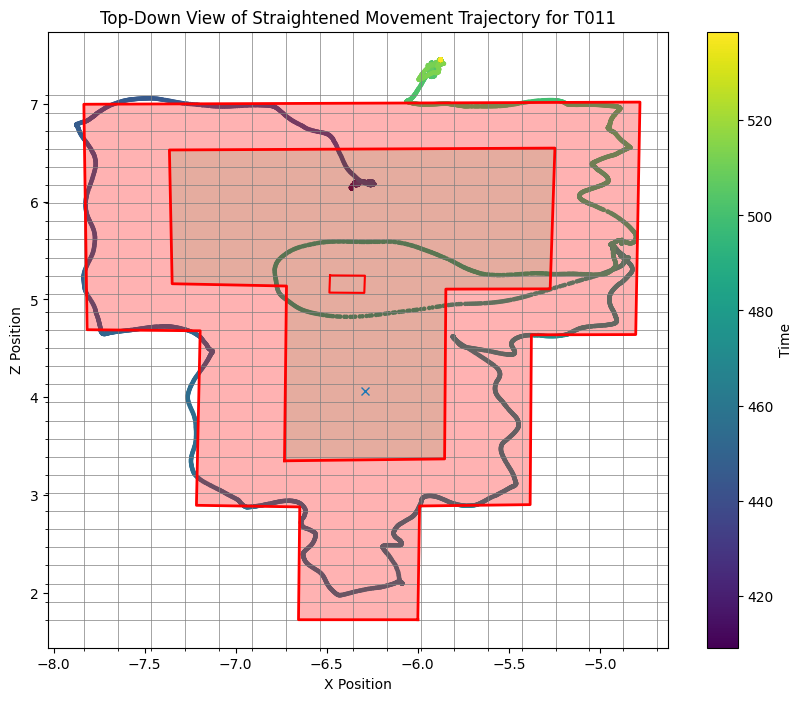

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from matplotlib.path import Path
from matplotlib.patches import Polygon

def calculate_tilt_angle(platform_coords):
    x1, z1 = platform_coords[0]
    x2, z2 = platform_coords[1]
    dx = x2 - x1
    dz = z2 - z1
    slope = dz / dx
    angle = np.arctan(slope)
    angle_deg = np.degrees(angle)
    return np.radians(-angle_deg)

def rotate_points(x, z, angle, center_x, center_z):
    x_centered = x - center_x
    z_centered = z - center_z
    x_rotated = x_centered * np.cos(angle) + z_centered * np.sin(angle)
    z_rotated = -x_centered * np.sin(angle) + z_centered * np.cos(angle)
    x_final = x_rotated + center_x
    z_final = z_rotated + center_z
    return x_final, z_final

def plot_movement_trajectory_with_layout(file_path, include_grid=True):
    platform_coords = [
        (-4.83, 1.89), (-5.46, 1.71), (-5.77, 2.82), (-6.32, 2.68),
        (-6.79, 4.40), (-7.39, 4.24), (-8.04, 6.45), (-5.11, 7.31),
        (-4.48, 5.02), (-5.03, 4.86), (-4.56, 3.19), (-5.14, 3.01),
    ]

    inner_platform_coords = [
        (-5.98, 3.25), (-6.46, 4.97), (-7.07, 4.82), (-7.46, 6.13),
        (-5.43, 6.73), (-5.06, 5.34), (-5.61, 5.18), (-5.14, 3.51)
    ]

    def draw_elevated_platform(ax, angle, center_x, center_z):
        # Rotate platform coordinates
        rotated_coords = [rotate_points(x, z, -angle, center_x, center_z) for x, z in platform_coords]
        rotated_coords.append(rotated_coords[0])  # Close the polygon
        xs, zs = zip(*rotated_coords)
        ax.plot(xs, zs, 'r-', linewidth=2)

        # Rotate inner platform coordinates
        rotated_inner_coords = [rotate_points(x, z, -angle, center_x, center_z) for x, z in inner_platform_coords]
        rotated_inner_coords.append(rotated_inner_coords[0])  # Close the polygon
        inner_xs, inner_zs = zip(*rotated_inner_coords)
        ax.plot(inner_xs, inner_zs, 'r-', linewidth=2)

        # Plot the center of the platform
        center_x_rotated, center_z_rotated = rotate_points(-5.75, 4.06, -angle, center_x, center_z)
        ax.plot(center_x_rotated, center_z_rotated, 'x')

        # Define pillar coordinates and rotate them
        pillar_coords = [
            (-6.26, 5.14),
            (-6.075, 5.19),
            (-6.03, 5.02),
            (-6.215, 4.97)
        ]
        rotated_pillar = [rotate_points(x, z, -angle, center_x, center_z) for x, z in pillar_coords]
        rotated_pillar.append(rotated_pillar[0])  # Close the polygon
        pxs, pzs = zip(*rotated_pillar)
        ax.plot(pxs, pzs, 'r-')

        # Create a Polygon for the outer platform
        outer_platform_polygon = Polygon(list(zip(xs, zs)), closed=True, facecolor='red', alpha=0.3)
        ax.add_patch(outer_platform_polygon)

        # Create a Polygon for the inner platform
        inner_platform_polygon = Polygon(list(zip(inner_xs, inner_zs)), closed=True, facecolor='green', alpha=0.1)
        ax.add_patch(inner_platform_polygon)

        if include_grid:
            # Calculate pillar size for grid spacing
            pillar_coords_array = np.array(pillar_coords)
            pillar_size = np.abs(pillar_coords_array[0] - pillar_coords_array[1]).max()

            # Define grid based on the rotated platform coordinates
            x_min, x_max = np.min(xs), np.max(xs)
            z_min, z_max = np.min(zs), np.max(zs)

            x_grid = np.arange(x_min, x_max + pillar_size, pillar_size)
            z_grid = np.arange(z_min, z_max + pillar_size, pillar_size)
            ax.set_xticks(x_grid, minor=True)
            ax.set_yticks(z_grid, minor=True)
            ax.grid(which='minor', color='gray', linestyle='-', linewidth=0.5)

    def draw_training_room(ax, angle, center_x, center_z):
        platform_coords = [
            (-4.79, 5.74), (-5.67, 9.17), (-8.89, 8.32), (-8.00, 4.91)
        ]
        rotated_coords = [rotate_points(x, z, angle, center_x, center_z) for x, z in platform_coords]
        rotated_coords.append(rotated_coords[0])
        xs, zs = zip(*rotated_coords)
        ax.plot(xs, zs, 'r-', linewidth=2)

    def draw_empty_room(ax):
        pass

    def draw_dark_maze_room(ax):
        pass

    # Extract scene ID from file name
    file_name = os.path.basename(file_path)
    scene_id = file_name.split('_')[2].split('.')[0]

    # Read movement data
    movement_data = pd.read_csv(file_path)
    pos_x = movement_data['pos_x']
    pos_z = movement_data['pos_z']
    time = movement_data['time']

    # Calculate tilt angle
    tilt_angle = calculate_tilt_angle(platform_coords)
    print(f"Calculated tilt angle: {np.degrees(tilt_angle):.2f} degrees")

    # Calculate center for rotation
    center_x = np.mean(pos_x)
    center_z = np.mean(pos_z)

    # Rotate positions
    pos_x_rotated, pos_z_rotated = rotate_points(pos_x, pos_z, -tilt_angle, center_x, center_z)

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 8))
    sc = ax.scatter(pos_x_rotated, pos_z_rotated, c=time, cmap='viridis', s=5)
    plt.xlabel('X Position')
    plt.ylabel('Z Position')
    plt.title(f'Top-Down View of Straightened Movement Trajectory for {scene_id}')
    plt.colorbar(sc, label='Time')
    plt.grid(False)

    # Draw the appropriate layout based on the scene ID
    if scene_id == 'T011':
        draw_elevated_platform(ax, tilt_angle, center_x, center_z)
    elif scene_id == 'T003':
        draw_training_room(ax, tilt_angle, center_x, center_z)
    elif scene_id == 'T007':
        draw_empty_room(ax)
    elif scene_id == 'T015':
        draw_dark_maze_room(ax)

    plt.show()

# Example usage
plot_movement_trajectory_with_layout(r'C:\Users\lal\Documents\tez\analysis\vr\pilotdatavr2\camera_movement_T011.csv', include_grid=True)

Calculated tilt angle: -15.95 degrees
Total platform area covered: 30.34%


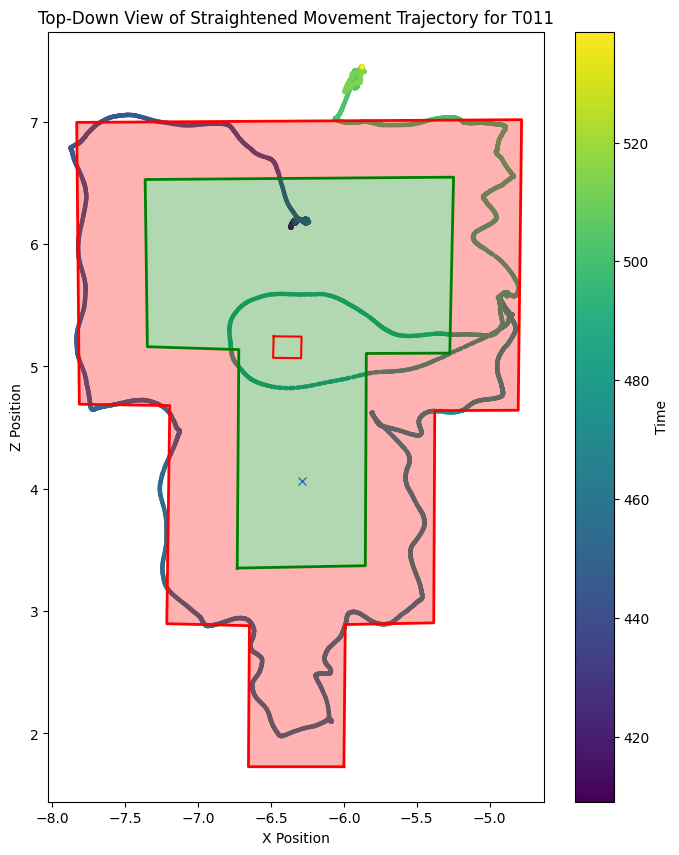

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from shapely.geometry import Polygon, LineString, MultiPolygon
from matplotlib.patches import PathPatch
from matplotlib.path import Path

def calculate_tilt_angle(platform_coords):
    x1, z1 = platform_coords[0]
    x2, z2 = platform_coords[1]
    dx = x2 - x1
    dz = z2 - z1
    slope = dz / dx
    angle = np.arctan(slope)
    angle_deg = np.degrees(angle)
    return np.radians(-angle_deg)

def rotate_points(x, z, angle, center_x, center_z):
    x_centered = x - center_x
    z_centered = z - center_z
    x_rotated = x_centered * np.cos(angle) + z_centered * np.sin(angle)
    z_rotated = -x_centered * np.sin(angle) + z_centered * np.cos(angle)
    x_final = x_rotated + center_x
    z_final = z_rotated + center_z
    return x_final, z_final

def create_path_from_polygon(polygon):
    if polygon.is_empty:
        return None

    vertices = []
    codes = []

    def extract_coords(poly):
        # Exterior ring
        x, y = poly.exterior.coords.xy
        coords = list(zip(x, y))
        vertices.extend(coords)
        codes.extend([Path.MOVETO] + [Path.LINETO]*(len(coords)-2) + [Path.CLOSEPOLY])

        # Interior rings (holes)
        for interior in poly.interiors:
            x, y = interior.coords.xy
            coords = list(zip(x, y))
            vertices.extend(coords)
            codes.extend([Path.MOVETO] + [Path.LINETO]*(len(coords)-2) + [Path.CLOSEPOLY])

    if isinstance(polygon, Polygon):
        extract_coords(polygon)
    elif isinstance(polygon, MultiPolygon):
        for poly in polygon.geoms:
            extract_coords(poly)
    else:
        raise ValueError("Unhandled geometry type: {}".format(type(polygon)))

    return Path(vertices, codes)

def plot_movement_trajectory_with_layout(file_path):
    platform_coords = [
        (-4.83, 1.89), (-5.46, 1.71), (-5.77, 2.82), (-6.32, 2.68),
        (-6.79, 4.40), (-7.39, 4.24), (-8.04, 6.45), (-5.11, 7.31),
        (-4.48, 5.02), (-5.03, 4.86), (-4.56, 3.19), (-5.14, 3.01),
    ]
    inner_platform_coords = [
        (-5.98, 3.25), (-6.46, 4.97), (-7.07, 4.82), (-7.46, 6.13),
        (-5.43, 6.73), (-5.06, 5.34), (-5.61, 5.18), (-5.14, 3.51)
    ]

    def draw_elevated_platform(ax, angle, center_x, center_z):
        # Rotate outer platform coordinates
        rotated_outer_coords = [rotate_points(x, z, -angle, center_x, center_z) for x, z in platform_coords]
        rotated_outer_coords.append(rotated_outer_coords[0])  # Close the polygon
        xs, zs = zip(*rotated_outer_coords)
        ax.plot(xs, zs, 'r-', linewidth=2)

        # Rotate inner platform coordinates
        rotated_inner_coords = [rotate_points(x, z, -angle, center_x, center_z) for x, z in inner_platform_coords]
        rotated_inner_coords.append(rotated_inner_coords[0])  # Close the polygon
        inner_xs, inner_zs = zip(*rotated_inner_coords)
        ax.plot(inner_xs, inner_zs, 'g-', linewidth=2)  # Use green color for inner platform

        # Create shapely Polygons for outer and inner platforms
        outer_polygon = Polygon(rotated_outer_coords)
        inner_polygon = Polygon(rotated_inner_coords)

        # Compute the area between the outer and inner polygons
        red_area_polygon = outer_polygon.difference(inner_polygon)

        # Create a Path from the red_area_polygon
        red_area_path = create_path_from_polygon(red_area_polygon)

        # Plot the red area (area between outer and inner platforms)
        if red_area_path:
            red_patch = PathPatch(red_area_path, facecolor='red', edgecolor='none', alpha=0.3)
            ax.add_patch(red_patch)

        # Create a Path from the inner_polygon
        inner_path = create_path_from_polygon(inner_polygon)

        # Plot the green area (inner platform)
        green_patch = PathPatch(inner_path, facecolor='green', edgecolor='none', alpha=0.3)
        ax.add_patch(green_patch)

        # Plot the center of the platform
        center_x_rotated, center_z_rotated = rotate_points(-5.75, 4.06, -angle, center_x, center_z)
        ax.plot(center_x_rotated, center_z_rotated, 'x')

        # Define pillar coordinates and rotate them
        pillar_coords = [
            (-6.26, 5.14),
            (-6.075, 5.19),
            (-6.03, 5.02),
            (-6.215, 4.97)
        ]
        rotated_pillar = [rotate_points(x, z, -angle, center_x, center_z) for x, z in pillar_coords]
        rotated_pillar.append(rotated_pillar[0])  # Close the polygon
        pxs, pzs = zip(*rotated_pillar)
        ax.plot(pxs, pzs, 'r-')

        # Combine all areas for calculation
        total_platform_area = outer_polygon

        # Calculate area coverage
        area_covered = calculate_area_covered(
            pos_x_rotated, pos_z_rotated, total_platform_area)
        print(f"Total platform area covered: {area_covered:.2f}%")

    def calculate_area_covered(pos_x, pos_z, total_platform_area):
        # Create a LineString from the trajectory points
        trajectory_line = LineString(zip(pos_x, pos_z))

        # Buffer the trajectory line to create an area representing the participant's coverage
        trajectory_area = trajectory_line.buffer(0.1)  # Adjust buffer size as needed

        # Calculate intersection with total platform area
        total_intersection = trajectory_area.intersection(total_platform_area)

        # Calculate areas
        total_area = total_platform_area.area
        total_covered_area = total_intersection.area
        percentage_covered = (total_covered_area / total_area) * 100

        return percentage_covered

    def draw_training_room(ax, angle, center_x, center_z):
        platform_coords = [
            (-4.79, 5.74), (-5.67, 9.17), (-8.89, 8.32), (-8.00, 4.91)
        ]
        rotated_coords = [rotate_points(x, z, angle, center_x, center_z) for x, z in platform_coords]
        rotated_coords.append(rotated_coords[0])
        xs, zs = zip(*rotated_coords)
        ax.plot(xs, zs, 'r-', linewidth=2)

    def draw_empty_room(ax):
        pass

    def draw_dark_maze_room(ax):
        pass

    # Extract scene ID from file name
    file_name = os.path.basename(file_path)
    scene_id = file_name.split('_')[2].split('.')[0]

    # Read movement data
    movement_data = pd.read_csv(file_path)
    pos_x = movement_data['pos_x']
    pos_z = movement_data['pos_z']
    time = movement_data['time']

    # Calculate tilt angle
    tilt_angle = calculate_tilt_angle(platform_coords)
    print(f"Calculated tilt angle: {np.degrees(tilt_angle):.2f} degrees")

    # Calculate center for rotation
    center_x = np.mean(pos_x)
    center_z = np.mean(pos_z)

    # Rotate positions
    pos_x_rotated, pos_z_rotated = rotate_points(pos_x, pos_z, -tilt_angle, center_x, center_z)

    # Plotting
    fig, ax = plt.subplots(figsize=(8, 10))
    sc = ax.scatter(pos_x_rotated, pos_z_rotated, c=time, cmap='viridis', s=5)
    plt.xlabel('X Position')
    plt.ylabel('Z Position')
    plt.title(f'Top-Down View of Straightened Movement Trajectory for {scene_id}')
    plt.colorbar(sc, label='Time')
    plt.grid(False)

    # Draw the appropriate layout based on the scene ID
    if scene_id == 'T011':
        draw_elevated_platform(ax, tilt_angle, center_x, center_z)
    elif scene_id == 'T003':
        draw_training_room(ax, tilt_angle, center_x, center_z)
    elif scene_id == 'T007':
        draw_empty_room(ax)
    elif scene_id == 'T015':
        draw_dark_maze_room(ax)

    plt.show()

# Example usage
plot_movement_trajectory_with_layout(r'C:\Users\lal\Documents\tez\analysis\vr\pilotdatavr2\camera_movement_T011.csv')


Calculated tilt angle: -15.95 degrees
Total platform area covered: 37.21%
Red area covered: 34.18%
Green area covered: 40.87%


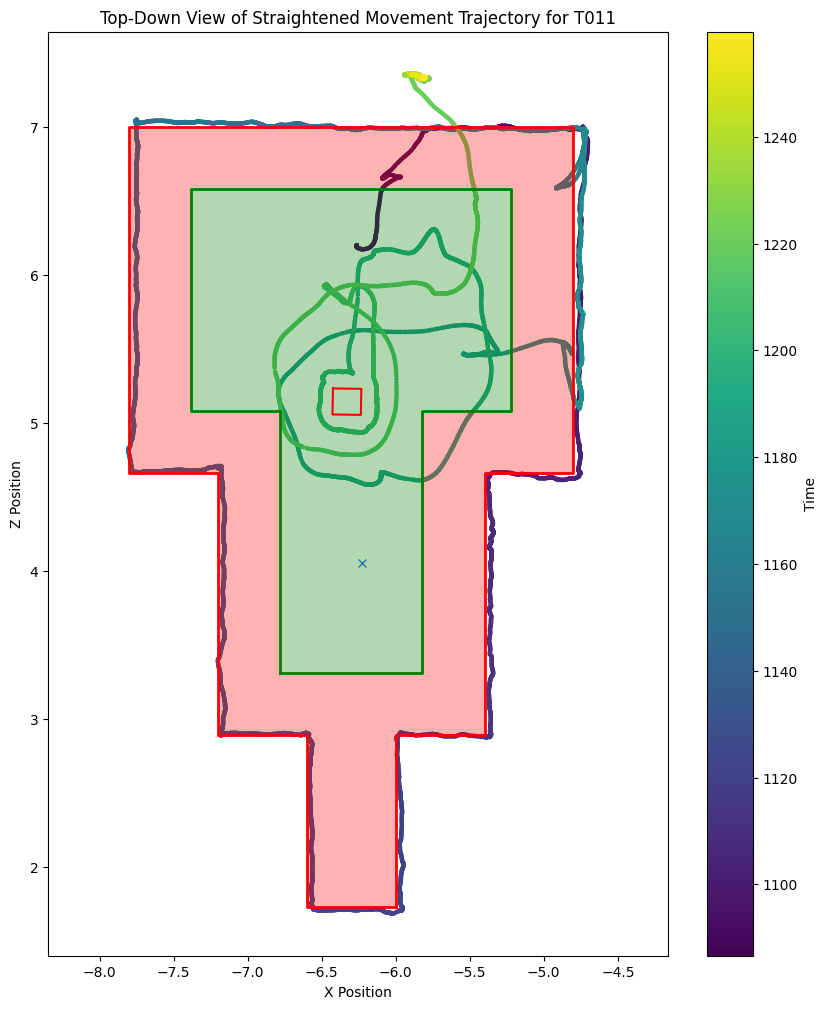

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from shapely.geometry import Polygon, LineString, MultiPolygon
from matplotlib.patches import PathPatch
from matplotlib.path import Path

def calculate_tilt_angle(platform_coords):
    x1, z1 = platform_coords[0]
    x2, z2 = platform_coords[1]
    dx = x2 - x1
    dz = z2 - z1
    slope = dz / dx
    angle = np.arctan(slope)
    angle_deg = np.degrees(angle)
    return np.radians(-angle_deg)

def rotate_points(x, z, angle, center_x, center_z):
    x_centered = x - center_x
    z_centered = z - center_z
    x_rotated = x_centered * np.cos(angle) + z_centered * np.sin(angle)
    z_rotated = -x_centered * np.sin(angle) + z_centered * np.cos(angle)
    x_final = x_rotated + center_x
    z_final = z_rotated + center_z
    return x_final, z_final

def create_path_from_polygon(polygon):
    if polygon.is_empty:
        return None

    vertices = []
    codes = []

    def extract_coords(poly):
        # Exterior ring
        x, y = poly.exterior.coords.xy
        coords = list(zip(x, y))
        vertices.extend(coords)
        codes.extend([Path.MOVETO] + [Path.LINETO]*(len(coords)-2) + [Path.CLOSEPOLY])

        # Interior rings (holes)
        for interior in poly.interiors:
            x, y = interior.coords.xy
            coords = list(zip(x, y))
            vertices.extend(coords)
            codes.extend([Path.MOVETO] + [Path.LINETO]*(len(coords)-2) + [Path.CLOSEPOLY])

    if isinstance(polygon, Polygon):
        extract_coords(polygon)
    elif isinstance(polygon, MultiPolygon):
        for poly in polygon.geoms:
            extract_coords(poly)
    else:
        raise ValueError("Unhandled geometry type: {}".format(type(polygon)))

    return Path(vertices, codes)

def plot_movement_trajectory_with_layout(file_path):
    platform_coords = [
        (-4.83, 1.89), (-5.46, 1.71), (-5.74, 2.84), (-6.32, 2.68),
        (-6.81, 4.40), (-7.39, 4.24), (-8.05, 6.47), (-5.11, 7.31),
        (-4.45, 5.06), (-5.03, 4.90), (-4.56, 3.17), (-5.14, 3.01),  
    ]
    inner_platform_coords = [
        (-6.00, 3.26), (-6.49, 4.98), (-7.07, 4.82), (-7.47, 6.15), (-5.43, 6.73), (-5.03, 5.38), (-5.60, 5.23), (-5.13, 3.50)
    ]

    def draw_elevated_platform(ax, angle, center_x, center_z):
        # Rotate outer platform coordinates
        #rotated_outer_coords = [rotate_points(x, z, -angle, center_x, center_z) for x, z in platform_coords]
        rotated_outer_coords = [(-6.00, 1.73), (-6.60, 1.73), (-6.60, 2.89), (-7.20, 2.89), (-7.20, 4.66), (-7.80, 4.66), (-7.80, 7.00), (-4.80, 7.00), (-4.80, 4.66), (-5.40, 4.66), (-5.40, 2.89), (-6.00, 2.89)]
        rotated_outer_coords.append(rotated_outer_coords[0])  # Close the polygon
        xs, zs = zip(*rotated_outer_coords)
        ax.plot(xs, zs, 'r-', linewidth=2)

        # Rotate inner platform coordinates
        #rotated_inner_coords = [rotate_points(x, z, -angle, center_x, center_z) for x, z in inner_platform_coords]
        rotated_inner_coords= [(-6.78, 3.31), (-6.78, 5.08), (-7.38, 5.08), (-7.38, 6.58), (-5.22, 6.58), (-5.22, 5.08), (-5.82, 5.08), (-5.82, 3.31)]
        rotated_inner_coords.append(rotated_inner_coords[0])  # Close the polygon
        inner_xs, inner_zs = zip(*rotated_inner_coords)
        ax.plot(inner_xs, inner_zs, 'g-', linewidth=2)  # Use green color for inner platform

        # Create shapely Polygons for outer and inner platforms
        outer_polygon = Polygon(rotated_outer_coords)
        inner_polygon = Polygon(rotated_inner_coords)

        # Compute the area between the outer and inner polygons
        red_area_polygon = outer_polygon.difference(inner_polygon)
        green_area_polygon = inner_polygon

        # Create a Path from the red_area_polygon
        red_area_path = create_path_from_polygon(red_area_polygon)

        # Plot the red area (area between outer and inner platforms)
        if red_area_path:
            red_patch = PathPatch(red_area_path, facecolor='red', edgecolor='none', alpha=0.3)
            ax.add_patch(red_patch)

        # Create a Path from the inner_polygon
        inner_path = create_path_from_polygon(inner_polygon)

        # Plot the green area (inner platform)
        green_patch = PathPatch(inner_path, facecolor='green', edgecolor='none', alpha=0.3)
        ax.add_patch(green_patch)

        # Plot the center of the platform
        center_x_rotated, center_z_rotated = rotate_points(-5.75, 4.06, -angle, center_x, center_z)
        ax.plot(center_x_rotated, center_z_rotated, 'x')

        # Define pillar coordinates and rotate them
        pillar_coords = [
            (-6.26, 5.14),
            (-6.075, 5.19),
            (-6.03, 5.02),
            (-6.215, 4.97)
        ]
        rotated_pillar = [rotate_points(x, z, -angle, center_x, center_z) for x, z in pillar_coords]
        rotated_pillar.append(rotated_pillar[0])  # Close the polygon
        pxs, pzs = zip(*rotated_pillar)
        ax.plot(pxs, pzs, 'r-')

        # Calculate area coverage
        total_area_covered, red_area_covered, green_area_covered = calculate_area_covered(
            pos_x_rotated, pos_z_rotated, outer_polygon, red_area_polygon, green_area_polygon)
        print(f"Total platform area covered: {total_area_covered:.2f}%")
        print(f"Red area covered: {red_area_covered:.2f}%")
        print(f"Green area covered: {green_area_covered:.2f}%")

    def calculate_area_covered(pos_x, pos_z, total_platform_area, red_area_polygon, green_area_polygon):
        # Create a LineString from the trajectory points
        trajectory_line = LineString(zip(pos_x, pos_z))

        # Buffer the trajectory line to create an area representing the participant's coverage
        trajectory_area = trajectory_line.buffer(0.1)  # Adjust buffer size as needed

        # Calculate intersections with each area
        total_intersection = trajectory_area.intersection(total_platform_area)
        red_intersection = trajectory_area.intersection(red_area_polygon)
        green_intersection = trajectory_area.intersection(green_area_polygon)

        # Calculate areas
        total_area = total_platform_area.area
        total_covered_area = total_intersection.area
        total_percentage_covered = (total_covered_area / total_area) * 100

        red_area = red_area_polygon.area
        red_covered_area = red_intersection.area
        red_percentage_covered = (red_covered_area / red_area) * 100 if red_area > 0 else 0

        green_area = green_area_polygon.area
        green_covered_area = green_intersection.area
        green_percentage_covered = (green_covered_area / green_area) * 100 if green_area > 0 else 0

        return total_percentage_covered, red_percentage_covered, green_percentage_covered

    def draw_training_room(ax, angle, center_x, center_z):
        platform_coords = [
            (-4.79, 5.74), (-5.67, 9.17), (-8.89, 8.32), (-8.00, 4.91)
        ]
        rotated_coords = [rotate_points(x, z, angle, center_x, center_z) for x, z in platform_coords]
        rotated_coords.append(rotated_coords[0])
        xs, zs = zip(*rotated_coords)
        ax.plot(xs, zs, 'r-', linewidth=2)

    def draw_empty_room(ax):
        pass

    def draw_dark_maze_room(ax):
        pass

    # Extract scene ID from file name
    file_name = os.path.basename(file_path)
    scene_id = file_name.split('_')[2].split('.')[0]

    # Read movement data
    movement_data = pd.read_csv(file_path)
    pos_x = movement_data['pos_x']
    pos_z = movement_data['pos_z']
    time = movement_data['time']

    # Calculate tilt angle
    tilt_angle = calculate_tilt_angle(platform_coords)
    print(f"Calculated tilt angle: {np.degrees(tilt_angle):.2f} degrees")

    # Calculate center for rotation
    center_x = np.mean(pos_x)
    center_z = np.mean(pos_z)

    # Rotate positions
    pos_x_rotated, pos_z_rotated = rotate_points(pos_x, pos_z, -tilt_angle, center_x, center_z)

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 12))
    sc = ax.scatter(pos_x_rotated, pos_z_rotated, c=time, cmap='viridis', s=5)
    plt.xlabel('X Position')
    plt.ylabel('Z Position')
    plt.title(f'Top-Down View of Straightened Movement Trajectory for {scene_id}')
    plt.colorbar(sc, label='Time')
    plt.grid(False)
    plt.axis('equal')

    # Draw the appropriate layout based on the scene ID
    if scene_id == 'T011':
        draw_elevated_platform(ax, tilt_angle, center_x, center_z)
    elif scene_id == 'T003':
        draw_training_room(ax, tilt_angle, center_x, center_z)
    elif scene_id == 'T007':
        draw_empty_room(ax)
    elif scene_id == 'T015':
        draw_dark_maze_room(ax)

    plt.show()

# Example usage
plot_movement_trajectory_with_layout(r'C:\Users\lal\Documents\tez\analysis\BEA_edges_11.09.24\S001\trackers\camera_movement_T011.csv')


Calculated tilt angle: -15.95 degrees
Total area covered: 25.48%
Green area covered: 26.67%


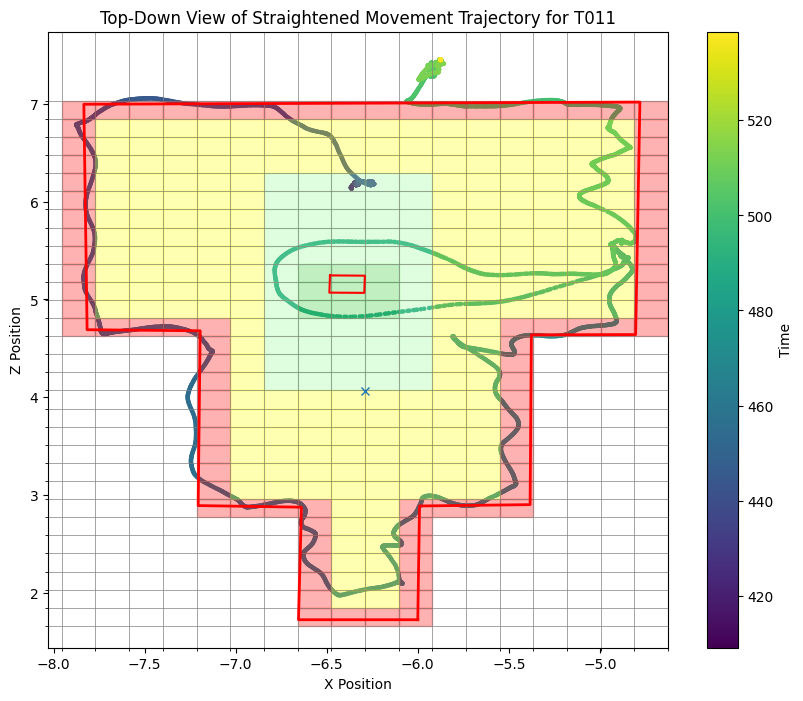

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from matplotlib.path import Path
from matplotlib.patches import Rectangle

def calculate_tilt_angle(platform_coords):
    x1, z1 = platform_coords[0]
    x2, z2 = platform_coords[1]
    dx = x2 - x1
    dz = z2 - z1
    slope = dz / dx
    angle = np.arctan(slope)
    angle_deg = np.degrees(angle)
    return np.radians(-angle_deg)

def rotate_points(x, z, angle, center_x, center_z):
    x_centered = x - center_x
    z_centered = z - center_z
    x_rotated = x_centered * np.cos(angle) + z_centered * np.sin(angle)
    z_rotated = -x_centered * np.sin(angle) + z_centered * np.cos(angle)
    x_final = x_rotated + center_x
    z_final = z_rotated + center_z
    return x_final, z_final

def plot_movement_trajectory_with_layout(file_path):
    platform_coords = [
        (-4.83, 1.89), (-5.46, 1.71), (-5.76, 2.82), (-6.31, 2.68),
        (-6.79, 4.40), (-7.39, 4.24), (-8.04, 6.45), (-5.11, 7.31),
        (-4.48, 5.02), (-5.03, 4.86), (-4.56, 3.19), (-5.14, 3.01),
    ]

    def draw_elevated_platform(ax, angle, center_x, center_z):
        # Rotate platform coordinates
        rotated_coords = [rotate_points(x, z, -angle, center_x, center_z) for x, z in platform_coords]
        rotated_coords.append(rotated_coords[0])  # Close the polygon
        xs, zs = zip(*rotated_coords)
        ax.plot(xs, zs, 'r-', linewidth=2)

        # Plot the center of the platform
        center_x_rotated, center_z_rotated = rotate_points(-5.75, 4.06, -angle, center_x, center_z)
        ax.plot(center_x_rotated, center_z_rotated, 'x')

        # Define pillar coordinates and rotate them
        pillar_coords = [
            (-6.26, 5.14),
            (-6.075, 5.19),
            (-6.03, 5.02),
            (-6.215, 4.97)
        ]
        rotated_pillar = [rotate_points(x, z, -angle, center_x, center_z) for x, z in pillar_coords]
        rotated_pillar.append(rotated_pillar[0])  # Close the polygon
        pxs, pzs = zip(*rotated_pillar)
        ax.plot(pxs, pzs, 'r-')

        # Calculate pillar size for grid spacing
        pillar_coords_array = np.array(pillar_coords)
        pillar_size = np.abs(pillar_coords_array[0] - pillar_coords_array[1]).max()

        # Define grid based on the rotated platform coordinates
        x_min = np.floor(np.min(xs) / pillar_size) * pillar_size
        x_max = np.ceil(np.max(xs) / pillar_size) * pillar_size
        z_min = np.floor(np.min(zs) / pillar_size) * pillar_size
        z_max = np.ceil(np.max(zs) / pillar_size) * pillar_size

        x_grid = np.arange(x_min, x_max + pillar_size, pillar_size)
        z_grid = np.arange(z_min, z_max + pillar_size, pillar_size)
        ax.set_xticks(x_grid, minor=True)
        ax.set_yticks(z_grid, minor=True)
        ax.grid(which='minor', color='gray', linestyle='-', linewidth=0.5)

        # Create a Path object for the platform polygon
        platform_path = Path(list(zip(xs, zs)))

        # Initialize lists to keep track of red and green squares
        red_squares = []
        green_squares = []

        # Highlight grid squares that intersect with platform edges in red
        for x_idx in range(len(x_grid) - 1):
            for z_idx in range(len(z_grid) - 1):
                x = x_grid[x_idx]
                z = z_grid[z_idx]
                square_path = Path([
                    (x, z),
                    (x + pillar_size, z),
                    (x + pillar_size, z + pillar_size),
                    (x, z + pillar_size),
                    (x, z)
                ])
                # Check for intersection with platform edges
                if platform_path.intersects_path(square_path, filled=False):
                    rect = plt.Rectangle((x, z), pillar_size, pillar_size, fill=True, color='red', alpha=0.3)
                    ax.add_patch(rect)
                    red_squares.append((z_idx, x_idx))  # Note: (z_idx, x_idx) for consistency with earlier code

        # Calculate the center of the pillar for highlighting adjacent squares
        pillar_center = np.mean(pillar_coords_array, axis=0)
        pillar_center_rotated = rotate_points(pillar_center[0], pillar_center[1], -angle, center_x, center_z)

        # Highlight the green area around the pillar
        green_squares = highlight_adjacent_squares(ax, pillar_center_rotated, x_grid, z_grid, pillar_size)

        # Highlight the yellow squares inside the platform but not red or green
        for x_idx in range(len(x_grid) - 1):
            for z_idx in range(len(z_grid) - 1):
                # Skip if the square is already red or green
                if (z_idx, x_idx) in red_squares or (z_idx, x_idx) in green_squares:
                    continue
                x = x_grid[x_idx]
                z = z_grid[z_idx]
                x_center = x + pillar_size / 2
                z_center = z + pillar_size / 2
                if platform_path.contains_point((x_center, z_center)):
                    rect = plt.Rectangle((x, z), pillar_size, pillar_size, fill=True, color='yellow', alpha=0.3)
                    ax.add_patch(rect)

        area_covered, green_area_covered = calculate_area_covered(
            pos_x_rotated, pos_z_rotated, x_grid, z_grid, green_squares)
        print(f"Total area covered: {area_covered:.2f}%")
        print(f"Green area covered: {green_area_covered:.2f}%")

    def highlight_adjacent_squares(ax, pillar_center, x_grid, z_grid, pillar_size):
        x_min = x_grid[0]
        z_min = z_grid[0]
        pillar_x_idx = int(round((pillar_center[0] - x_min) / pillar_size))
        pillar_z_idx = int(round((pillar_center[1] - z_min) / pillar_size))

        green_squares = []
        for i in range(-2, 3):  # Range from -2 to 2 (5x5 grid)
            for j in range(-5, 7):  # Range from -2 to 2 (5x5 grid)
                if -1 <= i <= 1 and -1 <= j <= 1:
                    color = 'limegreen'  # 3x3 center grid
                else:
                    color = 'palegreen'  # Outer squares of 5x5 grid

                x_idx = pillar_x_idx + i
                z_idx = pillar_z_idx + j - 1

                # Ensure indices are within grid bounds
                if 0 <= x_idx < len(x_grid) - 1 and 0 <= z_idx < len(z_grid) - 1:
                    x = x_grid[x_idx]
                    z = z_grid[z_idx]
                    rect = plt.Rectangle((x, z), pillar_size, pillar_size, fill=True, color=color, alpha=0.3)
                    ax.add_patch(rect)
                    green_squares.append((z_idx, x_idx))

        return green_squares

    def calculate_area_covered(pos_x, pos_z, x_grid, z_grid, green_squares):
        squares_covered = np.zeros((len(z_grid) - 1, len(x_grid) - 1), dtype=bool)
        for i in range(len(pos_x) - 1):
            x1, z1 = pos_x[i], pos_z[i]
            x2, z2 = pos_x[i + 1], pos_z[i + 1]
            x_idx1 = int((x1 - x_grid[0]) / (x_grid[1] - x_grid[0]))
            x_idx2 = int((x2 - x_grid[0]) / (x_grid[1] - x_grid[0]))
            z_idx1 = int((z1 - z_grid[0]) / (z_grid[1] - z_grid[0]))
            z_idx2 = int((z2 - z_grid[0]) / (z_grid[1] - z_grid[0]))

            # Ensure indices are within grid bounds
            x_idx1 = np.clip(x_idx1, 0, len(x_grid) - 2)
            x_idx2 = np.clip(x_idx2, 0, len(x_grid) - 2)
            z_idx1 = np.clip(z_idx1, 0, len(z_grid) - 2)
            z_idx2 = np.clip(z_idx2, 0, len(z_grid) - 2)

            min_x_idx = min(x_idx1, x_idx2)
            max_x_idx = max(x_idx1, x_idx2)
            min_z_idx = min(z_idx1, z_idx2)
            max_z_idx = max(z_idx1, z_idx2)

            squares_covered[min_z_idx:max_z_idx + 1, min_x_idx:max_x_idx + 1] = True

        total_squares = (len(z_grid) - 1) * (len(x_grid) - 1)
        covered_squares = np.sum(squares_covered)
        percentage_covered = (covered_squares / total_squares) * 100

        green_covered = sum(squares_covered[z, x] for z, x in green_squares)
        green_percentage_covered = (green_covered / len(green_squares)) * 100

        return percentage_covered, green_percentage_covered

    def draw_training_room(ax, angle, center_x, center_z):
        platform_coords = [
            (-4.79, 5.74), (-5.67, 9.17), (-8.89, 8.32), (-8.00, 4.91)
        ]
        rotated_coords = [rotate_points(x, z, angle, center_x, center_z) for x, z in platform_coords]
        rotated_coords.append(rotated_coords[0])
        xs, zs = zip(*rotated_coords)
        ax.plot(xs, zs, 'r-', linewidth=2)
        # Removed ax.fill to comply with your request

    def draw_empty_room(ax):
        pass

    def draw_dark_maze_room(ax):
        pass

    # Extract scene ID from file name
    file_name = os.path.basename(file_path)
    scene_id = file_name.split('_')[2].split('.')[0]

    # Read movement data
    movement_data = pd.read_csv(file_path)
    pos_x = movement_data['pos_x']
    pos_z = movement_data['pos_z']
    time = movement_data['time']

    # Calculate tilt angle
    tilt_angle = calculate_tilt_angle(platform_coords)
    print(f"Calculated tilt angle: {np.degrees(tilt_angle):.2f} degrees")

    # Calculate center for rotation
    center_x = np.mean(pos_x)
    center_z = np.mean(pos_z)

    # Rotate positions
    pos_x_rotated, pos_z_rotated = rotate_points(pos_x, pos_z, -tilt_angle, center_x, center_z)

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 8))
    sc = ax.scatter(pos_x_rotated, pos_z_rotated, c=time, cmap='viridis', s=5)
    plt.xlabel('X Position')
    plt.ylabel('Z Position')
    plt.title(f'Top-Down View of Straightened Movement Trajectory for {scene_id}')
    plt.colorbar(sc, label='Time')
    plt.grid(False)

    # Draw the appropriate layout based on the scene ID
    if scene_id == 'T011':
        draw_elevated_platform(ax, tilt_angle, center_x, center_z)
    elif scene_id == 'T003':
        draw_training_room(ax, tilt_angle, center_x, center_z)
    elif scene_id == 'T007':
        draw_empty_room(ax)
    elif scene_id == 'T015':
        draw_dark_maze_room(ax)

    plt.show()

# Example usage
plot_movement_trajectory_with_layout(r'C:\Users\lal\Documents\tez\analysis\vr\pilotdatavr2\camera_movement_T011.csv')


Calculated tilt angle: -15.95 degrees
Total area covered: 35.47%
Green area covered: 28.33%
Red area covered: 67.78%
Yellow area covered: 23.56%


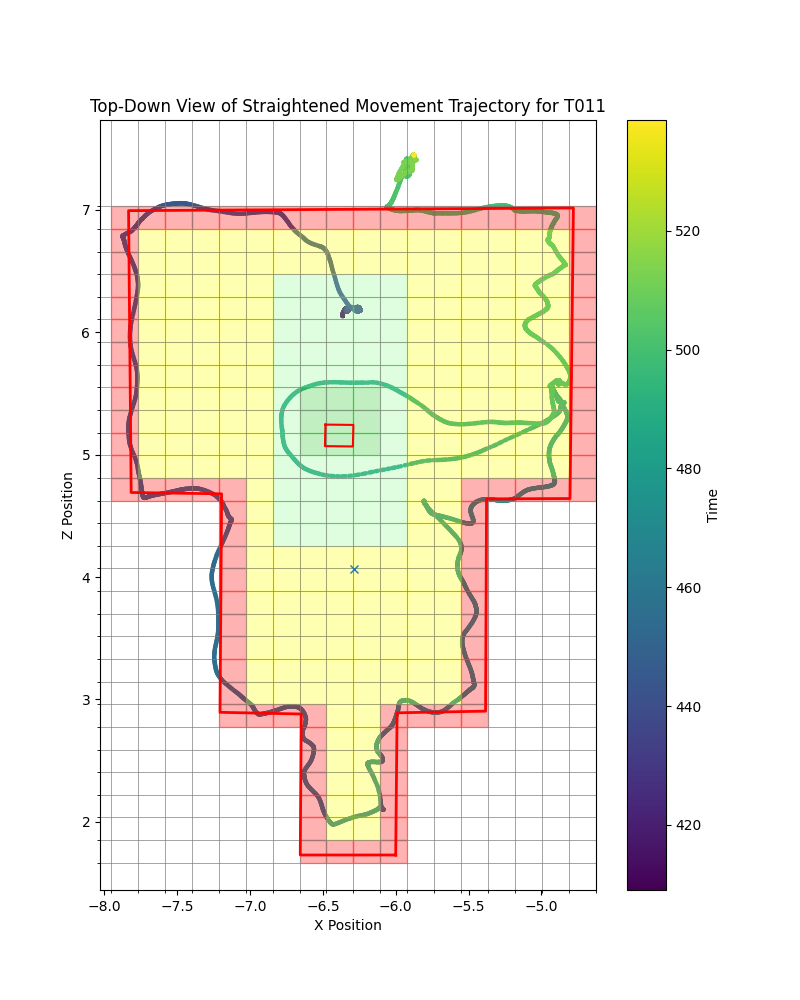

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from matplotlib.path import Path
from matplotlib.patches import Rectangle

def calculate_tilt_angle(platform_coords):
    x1, z1 = platform_coords[0]
    x2, z2 = platform_coords[1]
    dx = x2 - x1
    dz = z2 - z1
    slope = dz / dx
    angle = np.arctan(slope)
    angle_deg = np.degrees(angle)
    return np.radians(-angle_deg)

def rotate_points(x, z, angle, center_x, center_z):
    x_centered = x - center_x
    z_centered = z - center_z
    x_rotated = x_centered * np.cos(angle) + z_centered * np.sin(angle)
    z_rotated = -x_centered * np.sin(angle) + z_centered * np.cos(angle)
    x_final = x_rotated + center_x
    z_final = z_rotated + center_z
    return x_final, z_final

def plot_movement_trajectory_with_layout(file_path):
    platform_coords = [
        (-4.83, 1.89), (-5.46, 1.71), (-5.77, 2.82), (-6.31, 2.68),
        (-6.79, 4.40), (-7.39, 4.24), (-8.04, 6.45), (-5.11, 7.31),
        (-4.48, 5.02), (-5.03, 4.86), (-4.56, 3.19), (-5.14, 3.01),
    ]

    def draw_elevated_platform(ax, angle, center_x, center_z):
        # Rotate platform coordinates
        rotated_coords = [rotate_points(x, z, -angle, center_x, center_z) for x, z in platform_coords]
        rotated_coords.append(rotated_coords[0])  # Close the polygon
        xs, zs = zip(*rotated_coords)
        ax.plot(xs, zs, 'r-', linewidth=2)

        # Plot the center of the platform
        center_x_rotated, center_z_rotated = rotate_points(-5.75, 4.06, -angle, center_x, center_z)
        ax.plot(center_x_rotated, center_z_rotated, 'x')

        # Define pillar coordinates and rotate them
        pillar_coords = [(-6.26, 5.14), (-6.075, 5.19), (-6.03, 5.02), (-6.215, 4.97)]
        #pillar_coords=[(-6.27, 5.14), (-6.08, 5.18), (-6.04, 5.03), (-6.23, 4.98)]


        rotated_pillar = [rotate_points(x, z, -angle, center_x, center_z) for x, z in pillar_coords]
        rotated_pillar.append(rotated_pillar[0])  # Close the polygon
        pxs, pzs = zip(*rotated_pillar)
        ax.plot(pxs, pzs, 'r-')

        # Calculate pillar size for grid spacing
        pillar_coords_array = np.array(pillar_coords)
        pillar_size = np.abs(pillar_coords_array[0] - pillar_coords_array[1]).max()

        # Define grid based on the rotated platform coordinates
        x_min = np.floor(np.min(xs) / pillar_size) * pillar_size
        x_max = np.ceil(np.max(xs) / pillar_size) * pillar_size
        z_min = np.floor(np.min(zs) / pillar_size) * pillar_size
        z_max = np.ceil(np.max(zs) / pillar_size) * pillar_size

        x_grid = np.arange(x_min, x_max + pillar_size, pillar_size)
        z_grid = np.arange(z_min, z_max + pillar_size, pillar_size)
        ax.set_xticks(x_grid, minor=True)
        ax.set_yticks(z_grid, minor=True)
        ax.grid(which='minor', color='gray', linestyle='-', linewidth=0.5)

        # Create a Path object for the platform polygon
        platform_path = Path(list(zip(xs, zs)))

        # Initialize lists to keep track of red, green, and yellow squares
        red_squares = []
        green_squares = []
        yellow_squares = []

        # Highlight grid squares that intersect with platform edges in red
        for x_idx in range(len(x_grid) - 1):
            for z_idx in range(len(z_grid) - 1):
                x = x_grid[x_idx]
                z = z_grid[z_idx]
                square_path = Path([
                    (x, z),
                    (x + pillar_size, z),
                    (x + pillar_size, z + pillar_size),
                    (x, z + pillar_size),
                    (x, z)
                ])
                # Check for intersection with platform edges
                if platform_path.intersects_path(square_path, filled=False):
                    rect = plt.Rectangle((x, z), pillar_size, pillar_size, fill=True, color='red', alpha=0.3)
                    ax.add_patch(rect)
                    red_squares.append((z_idx, x_idx))  # Note: (z_idx, x_idx) for consistency

        # Calculate the center of the pillar for highlighting adjacent squares
        pillar_center = np.mean(pillar_coords_array, axis=0)
        pillar_center_rotated = rotate_points(pillar_center[0], pillar_center[1], -angle, center_x, center_z)

        # Highlight the green area around the pillar
        green_squares = highlight_adjacent_squares(ax, pillar_center_rotated, x_grid, z_grid, pillar_size)

        # Highlight the yellow squares inside the platform but not red or green
        for x_idx in range(len(x_grid) - 1):
            for z_idx in range(len(z_grid) - 1):
                # Skip if the square is already red or green
                if (z_idx, x_idx) in red_squares or (z_idx, x_idx) in green_squares:
                    continue
                x = x_grid[x_idx]
                z = z_grid[z_idx]
                x_center = x + pillar_size / 2
                z_center = z + pillar_size / 2
                if platform_path.contains_point((x_center, z_center)):
                    rect = plt.Rectangle((x, z), pillar_size, pillar_size, fill=True, color='yellow', alpha=0.3)
                    ax.add_patch(rect)
                    yellow_squares.append((z_idx, x_idx))

        # Combine all colored squares for total area calculation
        total_platform_squares = red_squares + green_squares + yellow_squares

        # Calculate area coverage
        area_covered, green_area_covered, red_area_covered, yellow_area_covered = calculate_area_covered(
            pos_x_rotated, pos_z_rotated, x_grid, z_grid, green_squares, red_squares, yellow_squares, total_platform_squares)
        print(f"Total area covered: {area_covered:.2f}%")
        print(f"Green area covered: {green_area_covered:.2f}%")
        print(f"Red area covered: {red_area_covered:.2f}%")
        print(f"Yellow area covered: {yellow_area_covered:.2f}%")

    def highlight_adjacent_squares(ax, pillar_center, x_grid, z_grid, pillar_size):
        x_min = x_grid[0]
        z_min = z_grid[0]
        pillar_x_idx = int(round((pillar_center[0] - x_min) / pillar_size))
        pillar_z_idx = int(round((pillar_center[1] - z_min) / pillar_size))

        green_squares = []
        for i in range(-2, 3):  # Range from -2 to 2 (5x5 grid)
            for j in range(-5, 7):  # Range from -2 to 2 (5x5 grid)
                if -1 <= i <= 1 and -1 <= j <= 1:
                    color = 'limegreen'  # 3x3 center grid
                else:
                    color = 'palegreen'  # Outer squares of 5x5 grid

                x_idx = pillar_x_idx + i
                z_idx = pillar_z_idx + j

                # Ensure indices are within grid bounds
                if 0 <= x_idx < len(x_grid) - 1 and 0 <= z_idx < len(z_grid) - 1:
                    x = x_grid[x_idx]
                    z = z_grid[z_idx]
                    rect = plt.Rectangle((x, z), pillar_size, pillar_size, fill=True, color=color, alpha=0.3)
                    ax.add_patch(rect)
                    green_squares.append((z_idx, x_idx))

        return green_squares

    def calculate_area_covered(pos_x, pos_z, x_grid, z_grid, green_squares, red_squares, yellow_squares, total_platform_squares):
        squares_covered = np.zeros((len(z_grid) - 1, len(x_grid) - 1), dtype=bool)
        for i in range(len(pos_x) - 1):
            x1, z1 = pos_x[i], pos_z[i]
            x2, z2 = pos_x[i + 1], pos_z[i + 1]
            x_idx1 = int((x1 - x_grid[0]) / (x_grid[1] - x_grid[0]))
            x_idx2 = int((x2 - x_grid[0]) / (x_grid[1] - x_grid[0]))
            z_idx1 = int((z1 - z_grid[0]) / (z_grid[1] - z_grid[0]))
            z_idx2 = int((z2 - z_grid[0]) / (z_grid[1] - z_grid[0]))

            # Ensure indices are within grid bounds
            x_idx1 = np.clip(x_idx1, 0, len(x_grid) - 2)
            x_idx2 = np.clip(x_idx2, 0, len(x_grid) - 2)
            z_idx1 = np.clip(z_idx1, 0, len(z_grid) - 2)
            z_idx2 = np.clip(z_idx2, 0, len(z_grid) - 2)

            min_x_idx = min(x_idx1, x_idx2)
            max_x_idx = max(x_idx1, x_idx2)
            min_z_idx = min(z_idx1, z_idx2)
            max_z_idx = max(z_idx1, z_idx2)

            squares_covered[min_z_idx:max_z_idx + 1, min_x_idx:max_x_idx + 1] = True

        # Total platform squares
        total_platform_area = len(total_platform_squares)

        # Squares covered on the platform
        platform_squares_covered = sum(squares_covered[z, x] for z, x in total_platform_squares)
        percentage_covered = (platform_squares_covered / total_platform_area) * 100

        # Green area coverage
        green_covered = sum(squares_covered[z, x] for z, x in green_squares)
        green_percentage_covered = (green_covered / len(green_squares)) * 100

        # Red area coverage
        red_covered = sum(squares_covered[z, x] for z, x in red_squares)
        red_percentage_covered = (red_covered / len(red_squares)) * 100

        # Yellow area coverage
        yellow_covered = sum(squares_covered[z, x] for z, x in yellow_squares)
        yellow_percentage_covered = (yellow_covered / len(yellow_squares)) * 100

        return percentage_covered, green_percentage_covered, red_percentage_covered, yellow_percentage_covered

    def draw_training_room(ax, angle, center_x, center_z):
        platform_coords = [
            (-4.79, 5.74), (-5.67, 9.17), (-8.89, 8.32), (-8.00, 4.91)
        ]
        rotated_coords = [rotate_points(x, z, angle, center_x, center_z) for x, z in platform_coords]
        rotated_coords.append(rotated_coords[0])
        xs, zs = zip(*rotated_coords)
        ax.plot(xs, zs, 'r-', linewidth=2)

    def draw_empty_room(ax):
        pass

    def draw_dark_maze_room(ax):
        pass

    # Extract scene ID from file name
    file_name = os.path.basename(file_path)
    scene_id = file_name.split('_')[2].split('.')[0]

    # Read movement data
    movement_data = pd.read_csv(file_path)
    pos_x = movement_data['pos_x']
    pos_z = movement_data['pos_z']
    time = movement_data['time']

    # Calculate tilt angle
    tilt_angle = calculate_tilt_angle(platform_coords)
    print(f"Calculated tilt angle: {np.degrees(tilt_angle):.2f} degrees")

    # Calculate center for rotation
    center_x = np.mean(pos_x)
    center_z = np.mean(pos_z)

    # Rotate positions
    pos_x_rotated, pos_z_rotated = rotate_points(pos_x, pos_z, -tilt_angle, center_x, center_z)

    # Plotting
    fig, ax = plt.subplots(figsize=(8, 10))
    sc = ax.scatter(pos_x_rotated, pos_z_rotated, c=time, cmap='viridis', s=5)
    plt.xlabel('X Position')
    plt.ylabel('Z Position')
    plt.title(f'Top-Down View of Straightened Movement Trajectory for {scene_id}')
    plt.colorbar(sc, label='Time')
    plt.grid(False)

    # Draw the appropriate layout based on the scene ID
    if scene_id == 'T011':
        draw_elevated_platform(ax, tilt_angle, center_x, center_z)
    elif scene_id == 'T003':
        draw_training_room(ax, tilt_angle, center_x, center_z)
    elif scene_id == 'T007':
        draw_empty_room(ax)
    elif scene_id == 'T015':
        draw_dark_maze_room(ax)

    plt.show()

# Example usage
plot_movement_trajectory_with_layout(r'C:\Users\lal\Documents\tez\analysis\vr\pilotdatavr2\camera_movement_T011.csv')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from shapely.geometry import Polygon, LineString, MultiPolygon, Point
from matplotlib.patches import PathPatch
from matplotlib.path import Path

def calculate_tilt_angle(platform_coords):
    x1, z1 = platform_coords[0]
    x2, z2 = platform_coords[1]
    dx = x2 - x1
    dz = z2 - z1
    slope = dz / dx
    angle = np.arctan(slope)
    angle_deg = np.degrees(angle)
    return np.radians(-angle_deg)

def rotate_points(x, z, angle, center_x, center_z):
    x_centered = x - center_x
    z_centered = z - center_z
    x_rotated = x_centered * np.cos(angle) + z_centered * np.sin(angle)
    z_rotated = -x_centered * np.sin(angle) + z_centered * np.cos(angle)
    x_final = x_rotated + center_x
    z_final = z_rotated + center_z
    return x_final, z_final

def create_path_from_polygon(polygon):
    if polygon.is_empty:
        return None

    vertices = []
    codes = []

    def extract_coords(poly):
        # Exterior ring
        x, y = poly.exterior.coords.xy
        coords = list(zip(x, y))
        vertices.extend(coords)
        codes.extend([Path.MOVETO] + [Path.LINETO]*(len(coords)-2) + [Path.CLOSEPOLY])

        # Interior rings (holes)
        for interior in poly.interiors:
            x, y = interior.coords.xy
            coords = list(zip(x, y))
            vertices.extend(coords)
            codes.extend([Path.MOVETO] + [Path.LINETO]*(len(coords)-2) + [Path.CLOSEPOLY])

    if isinstance(polygon, Polygon):
        extract_coords(polygon)
    elif isinstance(polygon, MultiPolygon):
        for poly in polygon.geoms:
            extract_coords(poly)
    else:
        raise ValueError("Unhandled geometry type: {}".format(type(polygon)))

    return Path(vertices, codes)

def calculate_speed(x1, z1, t1, x2, z2, t2):
    distance = np.sqrt((x2 - x1)**2 + (z2 - z1)**2)
    time_diff = t2 - t1
    if time_diff == 0:
        return 0
    return distance / time_diff

def draw_elevated_platform(ax, angle, center_x, center_z):
    platform_coords = [
        (-4.83, 1.89), (-5.46, 1.71), (-5.74, 2.84), (-6.32, 2.68),
        (-6.81, 4.40), (-7.39, 4.24), (-8.05, 6.47), (-5.11, 7.31),
        (-4.45, 5.06), (-5.03, 4.90), (-4.56, 3.17), (-5.14, 3.01),  
    ]
    inner_platform_coords = [
        (-6.00, 3.26), (-6.49, 4.98), (-7.07, 4.82), (-7.47, 6.15), (-5.43, 6.73), (-5.03, 5.38), (-5.60, 5.23), (-5.13, 3.50)
    ]

    rotated_outer_coords = [(-6.00, 1.73), (-6.60, 1.73), (-6.60, 2.89), (-7.20, 2.89), (-7.20, 4.66), (-7.80, 4.66), (-7.80, 7.00), (-4.80, 7.00), (-4.80, 4.66), (-5.40, 4.66), (-5.40, 2.89), (-6.00, 2.89)]
    rotated_outer_coords.append(rotated_outer_coords[0])  # Close the polygon
    xs, zs = zip(*rotated_outer_coords)
    ax.plot(xs, zs, 'r-', linewidth=2)

    rotated_inner_coords= [(-6.78, 3.31), (-6.78, 5.08), (-7.38, 5.08), (-7.38, 6.58), (-5.22, 6.58), (-5.22, 5.08), (-5.82, 5.08), (-5.82, 3.31)]
    rotated_inner_coords.append(rotated_inner_coords[0])  # Close the polygon
    inner_xs, inner_zs = zip(*rotated_inner_coords)
    ax.plot(inner_xs, inner_zs, 'g-', linewidth=2)  # Use green color for inner platform

    # Create shapely Polygons for outer and inner platforms
    outer_polygon = Polygon(rotated_outer_coords)
    inner_polygon = Polygon(rotated_inner_coords)

    # Compute the area between the outer and inner polygons
    red_area_polygon = outer_polygon.difference(inner_polygon)
    green_area_polygon = inner_polygon

    # Create a Path from the red_area_polygon
    red_area_path = create_path_from_polygon(red_area_polygon)

    # Plot the red area (area between outer and inner platforms)
    if red_area_path:
        red_patch = PathPatch(red_area_path, facecolor='red', edgecolor='none', alpha=0.3)
        ax.add_patch(red_patch)

    # Create a Path from the inner_polygon
    inner_path = create_path_from_polygon(inner_polygon)

    # Plot the green area (inner platform)
    green_patch = PathPatch(inner_path, facecolor='green', edgecolor='none', alpha=0.3)
    ax.add_patch(green_patch)

    # Plot the center of the platform
    center_x_rotated, center_z_rotated = rotate_points(-5.75, 4.06, -angle, center_x, center_z)
    ax.plot(center_x_rotated, center_z_rotated, 'x')

    # Define pillar coordinates and rotate them
    pillar_coords = [
        (-6.26, 5.14),
        (-6.075, 5.19),
        (-6.03, 5.02),
        (-6.215, 4.97)
    ]
    rotated_pillar = [rotate_points(x, z, -angle, center_x, center_z) for x, z in pillar_coords]
    rotated_pillar.append(rotated_pillar[0])  # Close the polygon
    pxs, pzs = zip(*rotated_pillar)
    ax.plot(pxs, pzs, 'r-')

    return outer_polygon, inner_polygon

def draw_training_room(ax, angle, center_x, center_z):
    platform_coords = [
        (-4.79, 5.74), (-5.67, 9.17), (-8.89, 8.32), (-8.00, 4.91)
    ]
    rotated_coords = [rotate_points(x, z, angle, center_x, center_z) for x, z in platform_coords]
    rotated_coords.append(rotated_coords[0])
    xs, zs = zip(*rotated_coords)
    ax.plot(xs, zs, 'r-', linewidth=2)

def draw_empty_room(ax):
    pass

def draw_dark_maze_room(ax):
    pass

def point_to_line_distance(x, y, x1, y1, x2, y2):
    A = x - x1
    B = y - y1
    C = x2 - x1
    D = y2 - y1

    dot = A * C + B * D
    len_sq = C * C + D * D
    param = -1
    if len_sq != 0:
        param = dot / len_sq

    if param < 0:
        xx = x1
        yy = y1
    elif param > 1:
        xx = x2
        yy = y2
    else:
        xx = x1 + param * C
        yy = y1 + param * D

    dx = x - xx
    dy = y - yy
    return np.sqrt(dx * dx + dy * dy)

def shortest_distance_to_walls(point, coords):
    x, y = point
    min_distance = float('inf')

    for i in range(len(coords)):
        x1, y1 = coords[i]
        x2, y2 = coords[(i + 1) % len(coords)]  # Wrap around to the first point
        distance = point_to_line_distance(x, y, x1, y1, x2, y2)
        min_distance = min(min_distance, distance)

    return min_distance

def calculate_area_covered_and_speeds(pos_x, pos_z, speeds, time, outer_polygon, inner_polygon):
    trajectory_points = [Point(x, z) for x, z in zip(pos_x, pos_z)]
    
    # Calculate area coverage
    trajectory_line = LineString(zip(pos_x, pos_z))
    trajectory_area = trajectory_line.buffer(0.1)
    
    total_intersection = trajectory_area.intersection(outer_polygon)
    green_intersection = trajectory_area.intersection(inner_polygon)
    red_intersection = total_intersection.difference(green_intersection)
    
    total_area = outer_polygon.area
    green_area = inner_polygon.area
    red_area = total_area - green_area
    
    total_percentage_covered = (total_intersection.area / total_area) * 100
    green_percentage_covered = (green_intersection.area / green_area) * 100
    red_percentage_covered = (red_intersection.area / red_area) * 100
    
    # Calculate speeds, accelerations, stops, and time spent for safe and unsafe areas
    safe_speeds = []
    unsafe_speeds = []
    safe_accelerations = []
    unsafe_accelerations = []
    time_in_safe_area = 0
    time_in_unsafe_area = 0
    
    stop_threshold = 0.01  # m/s
    stop_duration_threshold = 0.5  # seconds
    
    safe_stops = []
    unsafe_stops = []
    current_stop_start = None
    current_stop_area = None
    
    # Calculate shortest distances to walls
    outer_coords = list(outer_polygon.exterior.coords)
    distances_to_walls = [shortest_distance_to_walls((x, z), outer_coords) for x, z in zip(pos_x, pos_z)]
    average_distance_to_walls = np.mean(distances_to_walls)
    
    for i, (point, speed) in enumerate(zip(trajectory_points, speeds)):
        if inner_polygon.contains(point):
            safe_speeds.append(speed)
            if i > 0:
                time_diff = time[i] - time[i-1]
                time_in_safe_area += time_diff
                if i > 1:
                    acceleration = (speed - speeds[i-1]) / time_diff
                    safe_accelerations.append(acceleration)
            
            if speed < stop_threshold:
                if current_stop_start is None:
                    current_stop_start = time[i]
                    current_stop_area = 'safe'
            else:
                if current_stop_start is not None and current_stop_area == 'safe':
                    stop_duration = time[i] - current_stop_start
                    if stop_duration >= stop_duration_threshold:
                        safe_stops.append(stop_duration)
                    current_stop_start = None
                    current_stop_area = None
        
        elif outer_polygon.contains(point):
            unsafe_speeds.append(speed)
            if i > 0:
                time_diff = time[i] - time[i-1]
                time_in_unsafe_area += time_diff
                if i > 1:
                    acceleration = (speed - speeds[i-1]) / time_diff
                    unsafe_accelerations.append(acceleration)
            
            if speed < stop_threshold:
                if current_stop_start is None:
                    current_stop_start = time[i]
                    current_stop_area = 'unsafe'
            else:
                if current_stop_start is not None and current_stop_area == 'unsafe':
                    stop_duration = time[i] - current_stop_start
                    if stop_duration >= stop_duration_threshold:
                        unsafe_stops.append(stop_duration)
                    current_stop_start = None
                    current_stop_area = None
    
    # Check for any ongoing stop at the end of the trajectory
    if current_stop_start is not None:
        stop_duration = time[-1] - current_stop_start
        if stop_duration >= stop_duration_threshold:
            if current_stop_area == 'safe':
                safe_stops.append(stop_duration)
            else:
                unsafe_stops.append(stop_duration)

    return (total_percentage_covered, red_percentage_covered, green_percentage_covered,
            safe_speeds, unsafe_speeds, safe_accelerations, unsafe_accelerations,
            time_in_safe_area, time_in_unsafe_area, safe_stops, unsafe_stops,
            average_distance_to_walls)

def plot_movement_trajectory_with_layout(file_path):
    # Extract scene ID from file name
    file_name = os.path.basename(file_path)
    scene_id = file_name.split('_')[2].split('.')[0]

    # Read movement data
    movement_data = pd.read_csv(file_path)
    pos_x = movement_data['pos_x']
    pos_z = movement_data['pos_z']
    time = movement_data['time']

    # Calculate tilt angle
    platform_coords = [
        (-4.83, 1.89), (-5.46, 1.71), (-5.74, 2.84), (-6.32, 2.68),
        (-6.81, 4.40), (-7.39, 4.24), (-8.05, 6.47), (-5.11, 7.31),
        (-4.45, 5.06), (-5.03, 4.90), (-4.56, 3.17), (-5.14, 3.01),  
    ]
    tilt_angle = calculate_tilt_angle(platform_coords)
    print(f"Calculated tilt angle: {np.degrees(tilt_angle):.2f} degrees")

    # Calculate center for rotation
    center_x = np.mean(pos_x)
    center_z = np.mean(pos_z)

    # Rotate positions
    pos_x_rotated, pos_z_rotated = rotate_points(pos_x, pos_z, -tilt_angle, center_x, center_z)

    # Calculate speeds
    speeds = [0]  # First point has no speed
    for i in range(1, len(pos_x_rotated)):
        speed = calculate_speed(pos_x_rotated[i-1], pos_z_rotated[i-1], time[i-1],
                                pos_x_rotated[i], pos_z_rotated[i], time[i])
        speeds.append(speed)

    # Plotting
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 20))
    sc = ax1.scatter(pos_x_rotated, pos_z_rotated, c=time, cmap='viridis', s=5)
    ax1.set_xlabel('X Position')
    ax1.set_ylabel('Z Position')
    ax1.set_title(f'Top-Down View of Straightened Movement Trajectory for {scene_id}')
    plt.colorbar(sc, ax=ax1, label='Time')
    ax1.grid(False)
    ax1.axis('equal')

    # Draw the appropriate layout based on the scene ID
    if scene_id == 'T011':
        outer_polygon, inner_polygon = draw_elevated_platform(ax1, tilt_angle, center_x, center_z)
        
        # Calculate area coverage, speeds, accelerations, stops, and time spent for safe/unsafe areas
        (total_area_covered, red_area_covered, green_area_covered, 
         safe_speeds, unsafe_speeds, safe_accelerations, unsafe_accelerations,
         time_in_safe_area, time_in_unsafe_area, safe_stops, unsafe_stops,
         average_distance_to_walls) = calculate_area_covered_and_speeds(
            pos_x_rotated, pos_z_rotated, speeds, time, outer_polygon, inner_polygon)
        
        print(f"Total platform area covered: {total_area_covered:.2f}%")
        print(f"Unsafe (red) area covered: {red_area_covered:.2f}%")
        print(f"Safe (green) area covered: {green_area_covered:.2f}%")
        
        print(f"\nTime spent in safe area: {time_in_safe_area:.2f} seconds")
        print(f"Time spent in unsafe area: {time_in_unsafe_area:.2f} seconds")
        
        print(f"\nOverall speed statistics:")
        print(f"Min speed: {min(speeds):.2f}")
        print(f"Max speed: {max(speeds):.2f}")
        print(f"Avg speed: {np.mean(speeds):.2f}")
        
        print(f"\nSafe area speed statistics:")
        print(f"Min speed: {min(safe_speeds):.2f}")
        print(f"Max speed: {max(safe_speeds):.2f}")
        print(f"Avg speed: {np.mean(safe_speeds):.2f}")
        
        print(f"\nUnsafe area speed statistics:")
        print(f"Min speed: {min(unsafe_speeds):.2f}")
        print(f"Max speed: {max(unsafe_speeds):.2f}")
        print(f"Avg speed: {np.mean(unsafe_speeds):.2f}")
        
        print(f"\nSafe area acceleration statistics:")
        print(f"Min acceleration: {min(safe_accelerations):.2f}")
        print(f"Max acceleration: {max(safe_accelerations):.2f}")
        print(f"Avg acceleration: {np.mean(safe_accelerations):.2f}")
        
        print(f"\nUnsafe area acceleration statistics:")
        print(f"Min acceleration: {min(unsafe_accelerations):.2f}")
        print(f"Max acceleration: {max(unsafe_accelerations):.2f}")
        print(f"Avg acceleration: {np.mean(unsafe_accelerations):.2f}")
        
        print(f"\nOverall acceleration statistics:")
        all_accelerations = safe_accelerations + unsafe_accelerations
        print(f"Min acceleration: {min(all_accelerations):.2f}")
        print(f"Max acceleration: {max(all_accelerations):.2f}")
        print(f"Avg acceleration: {np.mean(all_accelerations):.2f}")
        
        print(f"\nStops in safe area:")
        print(f"Number of stops: {len(safe_stops)}")
        if safe_stops:
            print(f"Average stop duration: {np.mean(safe_stops):.2f} seconds")
            print(f"Longest stop duration: {max(safe_stops):.2f} seconds")
        
        print(f"\nStops in unsafe area:")
        print(f"Number of stops: {len(unsafe_stops)}")
        if unsafe_stops:
            print(f"Average stop duration: {np.mean(unsafe_stops):.2f} seconds")
            print(f"Longest stop duration: {max(unsafe_stops):.2f} seconds")
        
        print(f"\nAverage distance to walls: {average_distance_to_walls:.2f}")
        
    elif scene_id == 'T003':
        draw_training_room(ax1, tilt_angle, center_x, center_z)
    elif scene_id == 'T007':
        draw_empty_room(ax1)
    elif scene_id == 'T015':
        draw_dark_maze_room(ax1)

    plt.tight_layout()
    plt.show()

# Example usage
plot_movement_trajectory_with_layout(r'C:\Users\lal\Documents\tez\analysis\BEA_edges_11.09.24\S001\trackers\camera_movement_T011.csv')

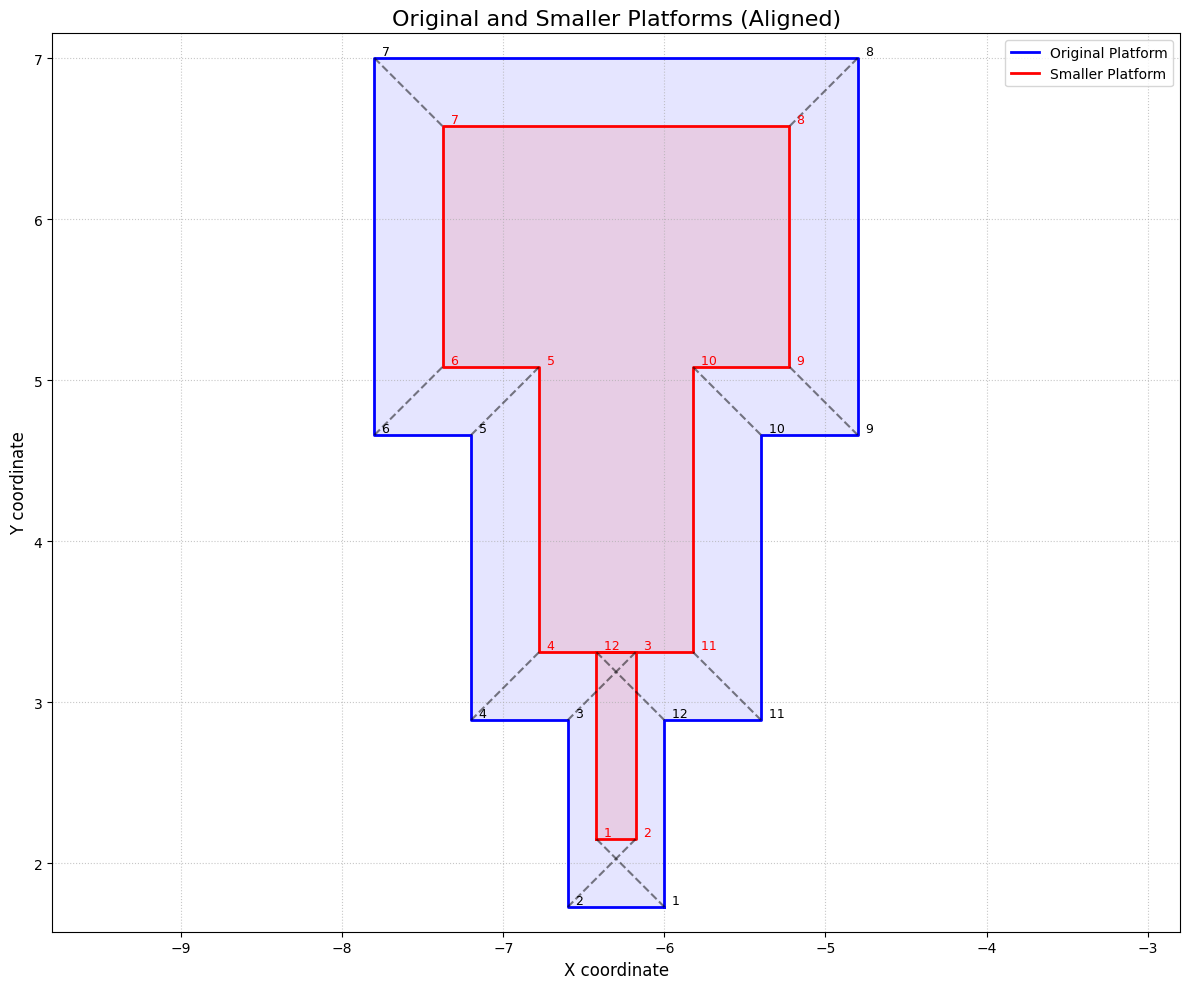

New coordinates:
1: (-6.42, 2.15)
2: (-6.18, 2.15)
3: (-6.18, 3.31)
4: (-6.78, 3.31)
5: (-6.78, 5.08)
6: (-7.38, 5.08)
7: (-7.38, 6.58)
8: (-5.22, 6.58)
9: (-5.22, 5.08)
10: (-5.82, 5.08)
11: (-5.82, 3.31)
12: (-6.42, 3.31)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def normalize(v):
    norm = np.linalg.norm(v)
    return v / norm if norm != 0 else v

def get_normal(p1, p2):
    dx, dy = p2 - p1
    return normalize(np.array([-dy, dx]))

def offset_polygon(polygon, distance):
    n = len(polygon)
    normals = [get_normal(polygon[i], polygon[(i+1)%n]) for i in range(n)]
    avg_normals = [normalize(normals[i-1] + normals[i]) for i in range(n)]
    # Subtract distance to shrink the polygon
    return [p - distance * n for p, n in zip(polygon, avg_normals)]

# Original platform coordinates
#platform_coords = [(-4.83, 1.89), (-5.41, 1.73), (-5.74, 2.84), (-6.32, 2.68),(-6.81, 4.40), (-7.39, 4.24), (-8.05, 6.47), (-5.11, 7.31),(-4.45, 5.06), (-5.03, 4.90), (-4.56, 3.17), (-5.14, 3.01),]

platform_coords = [(-6.00, 1.73), (-6.60, 1.73), (-6.60, 2.89), (-7.20, 2.89), (-7.20, 4.66), (-7.80, 4.66), (-7.80, 7.00), (-4.80, 7.00), (-4.80, 4.66), (-5.40, 4.66), (-5.40, 2.89), (-6.00, 2.89)]


coords = np.array(platform_coords)
new_coords = np.array(offset_polygon(coords, 0.60))

# Plotting
plt.figure(figsize=(12, 10))

# Plot original platform
plt.plot(np.append(coords[:, 0], coords[0, 0]), np.append(coords[:, 1], coords[0, 1]), 'b-', linewidth=2, label='Original Platform')
plt.fill(coords[:, 0], coords[:, 1], 'b', alpha=0.1)

# Plot smaller platform
plt.plot(np.append(new_coords[:, 0], new_coords[0, 0]), np.append(new_coords[:, 1], new_coords[0, 1]), 'r-', linewidth=2, label='Smaller Platform')
plt.fill(new_coords[:, 0], new_coords[:, 1], 'r', alpha=0.1)

# Add points and labels
for i, (orig, new) in enumerate(zip(coords, new_coords), 1):
    plt.plot([orig[0], new[0]], [orig[1], new[1]], 'k--', alpha=0.5)
    plt.text(orig[0], orig[1], f'  {i}', fontsize=9, va='bottom')
    plt.text(new[0], new[1], f'  {i}', fontsize=9, va='bottom', color='red')

# Customize the plot
plt.title('Original and Smaller Platforms (Aligned)', fontsize=16)
plt.xlabel('X coordinate', fontsize=12)
plt.ylabel('Y coordinate', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle=':', alpha=0.7)
plt.axis('equal')

# Show the plot
plt.tight_layout()
plt.show()

# Print new coordinates
print("New coordinates:")
for i, coord in enumerate(new_coords, 1):
    print(f"{i}: ({coord[0]:.2f}, {coord[1]:.2f})") 


In [1]:

def pixel_to_cartesian(pixel_coords, image_coords, real_coords):
    # Extract x and y coordinates from image_coords and real_coords
    image_x = image_coords[:, 0]
    image_y = image_coords[:, 1]
    real_x = real_coords[:, 0]
    real_y = real_coords[:, 1]

    # Calculate the coefficients for the linear transformation
    coefficients = np.polyfit(image_x, real_x, 1)
    a_x = coefficients[0]
    b_x = coefficients[1]

    coefficients = np.polyfit(image_y, real_y, 1)
    a_y = coefficients[0]
    b_y = coefficients[1]

    # Convert pixel coordinates to cartesian coordinates
    px, py = pixel_coords
    cx = a_x * px + b_x
    cy = a_y * py + b_y

    cx = round(cx, 2)
    cy = round(cy, 2)

    return cx, cy

In [4]:
real_coords = np.array([
    [-8.90, 8.21],
    [-5.39, 9.03],
    [-7.03, 0.97],
    [-3.56, 1.81]
])

image_coords = np.array([
    [298, 192],
    [554, 127],
    [434, 720],
    [689, 653]
])

In [56]:
pixel_coords=(416, 624)
# Convert pixel coordinates to cartesian coordinates
cartesian_coords = pixel_to_cartesian(pixel_coords, image_coords, real_coords)

print("Cartesian Coordinates:", cartesian_coords)

Cartesian Coordinates: (-7.28, 2.25)


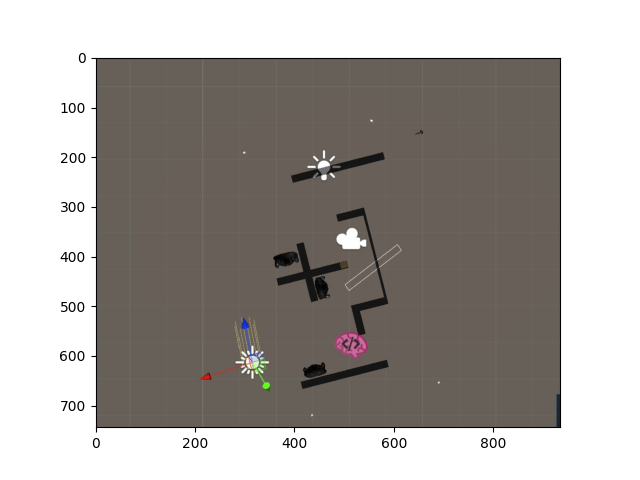

Clicked coordinates: Pixel - (491.0056845360422, 425.5220420658768), Cartesian - (-6.26, 4.97)
Clicked coordinates: Pixel - (489.2828648105096, 411.0648024264415), Cartesian - (-6.28, 5.17)
Clicked coordinates: Pixel - (503.4333268548431, 408.2347100175748), Cartesian - (-6.09, 5.21)
Clicked coordinates: Pixel - (505.5558961614932, 419.5550796530415), Cartesian - (-6.06, 5.05)
Clicked coordinates: Pixel - (504.8483730592765, 420.97012585747484), Cartesian - (-6.07, 5.03)


In [7]:
def on_mouse_click(event):
    if event.button == 1:  # Left mouse 
        x, y = event.xdata, event.ydata
        cartesian_coords = pixel_to_cartesian((x,y), image_coords, real_coords)
        ax.scatter(x, y, color='red')
        ax.text(x, y, f'{cartesian_coords}', fontsize=12, color='red')
        print(f"Clicked coordinates: Pixel - {x,y}, Cartesian - {cartesian_coords}")

# Load the image
image = plt.imread(r"C:\Users\lal\Pictures\Unbenannt.png")

# Create a figure and axis
fig, ax = plt.subplots()

# Display the image
ax.imshow(image)

# Connect the mouse click event to the callback function
fig.canvas.mpl_connect('button_press_event', on_mouse_click)

# Show the plot
plt.show()